# Objective: Analyze Olist customer data.

## 1. Load, analyze, and merge customer datasets (coherent variables).

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Get the current working directory
current_directory = os.getcwd()

# List all files in the current directory
files = os.listdir(current_directory)

# Filter out the CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# Read all CSV files into a list of dataframes
dataframes = [pd.read_csv(os.path.join(current_directory, file)) for file in csv_files]

# Print the names of the CSV files and their corresponding dataframes
for file, df in zip(csv_files, dataframes):
    print(f"File: {file}")
    print(df.head())

File: customers.csv
   index                       customer_id                customer_unique_id  \
0      0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
File: geoloc.csv
   index  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \

In [4]:
df_costumer = pd.read_csv('customers.csv')
df_geoloc = pd.read_csv('geoloc.csv')
df_items = pd.read_csv('order_items.csv')
df_pymts = pd.read_csv('order_pymts.csv')
df_reviews = pd.read_csv('order_reviews.csv')
df_products = pd.read_csv('products.csv')
df_sellers = pd.read_csv('sellers.csv')
df_translation = pd.read_csv('translation.csv')
df_orders_items= pd.read_csv("order_items.csv")
df_order_pymts= pd.read_csv("order_pymts.csv")
df_order_reviews= pd.read_csv("order_reviews.csv")
df_orders= pd.read_csv("orders.csv")

## df_geoloc

In [5]:
df_costumer

index                       customer_id  \
0          0  06b8999e2fba1a1fbc88172c00ba8bc7   
1          1  18955e83d337fd6b2def6b18a428ac77   
2          2  4e7b3e00288586ebd08712fdd0374a03   
3          3  b2b6027bc5c5109e529d4dc6358b12c3   
4          4  4f2d8ab171c80ec8364f7c12e35b23ad   
...      ...                               ...   
99436  99436  17ddf5dd5d51696bb3d7c6291687be6f   
99437  99437  e7b71a9017aa05c9a7fd292d714858e8   
99438  99438  5e28dfe12db7fb50a4b2f691faecea5e   
99439  99439  56b18e2166679b8a959d72dd06da27f9   
99440  99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
99437  d52a67c98be1cf6a5c84435bd38d095d                      6764   
99438  e9f50caf99f032f0bf3c55141f019d99                     60115   
99439  73c2643a0a458b49f58cea58833b192e                     92120   
99440  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  
0                     franca             SP  
1      sao bernardo do campo             SP  
2                  sao paulo             SP  
3            mogi das cruzes             SP  
4                   campinas             SP  
...                      ...            ...  
99436              sao paulo             SP  
99437        taboao da serra             SP  
99438              fortaleza             CE  
99439                 canoas             RS  
99440                  cotia             SP  

[99441 rows x 6 columns]

In [6]:
# Dictionnaire de correspondance des abréviations des états brésiliens aux noms des pays en français
state_to_country = {
    'SP': 'BRÉSIL',
    'RJ': 'BRÉSIL',
    'MG': 'BRÉSIL',
    'ES': 'BRÉSIL',
    'PR': 'BRÉSIL',
    'SC': 'BRÉSIL',
    'RS': 'BRÉSIL',
    'BA': 'BRÉSIL',
    'SE': 'BRÉSIL',
    'AL': 'BRÉSIL',
    'PE': 'BRÉSIL',
    'PB': 'BRÉSIL',
    'RN': 'BRÉSIL',
    'CE': 'BRÉSIL',
    'PI': 'BRÉSIL',
    'MA': 'BRÉSIL',
    'PA': 'BRÉSIL',
    'AP': 'BRÉSIL',
    'TO': 'BRÉSIL',
    'RO': 'BRÉSIL',
    'AC': 'BRÉSIL',
    'AM': 'BRÉSIL',
    'RR': 'BRÉSIL',
    'MT': 'BRÉSIL',
    'MS': 'BRÉSIL',
    'GO': 'BRÉSIL',
    'DF': 'BRÉSIL'
}

# Remplacer les abréviations des états par les noms des pays en français et en majuscules
df_costumer['customer_state'] = df_costumer['customer_state'].map(state_to_country)

# Afficher les premières lignes du dataframe pour vérifier la transformation
print(df_costumer.head())

   index                       customer_id                customer_unique_id  \
0      0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca         BRÉSIL  
1                      9790  sao bernardo do campo         BRÉSIL  
2                      1151              sao paulo         BRÉSIL  
3                      8775        mogi das cruzes         BRÉSIL  
4                     13056               campinas         BRÉSIL  


In [7]:
df_geoloc[df_geoloc["geolocation_zip_code_prefix"] == 22790]

index  geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
454148  454148                        22790       -23.011335       -43.450256   
454149  454149                        22790       -23.009535       -43.436039   
454155  454155                        22790       -23.018713       -43.452904   
454162  454162                        22790       -23.005940       -43.481812   
454163  454163                        22790       -23.006000       -43.481799   
...        ...                          ...              ...              ...   
459110  459110                        22790       -23.014607       -43.452773   
459111  459111                        22790       -22.993299       -43.447355   
459114  459114                        22790       -23.030401       -43.473877   
459119  459119                        22790       -23.016384       -43.476303   
459140  459140                        22790       -23.018953       -43.474704   

       geolocation_city geolocation_state  
454148   rio de janeiro                RJ  
454149   rio de janeiro                RJ  
454155   rio de janeiro                RJ  
454162   rio de janeiro                RJ  
454163   rio de janeiro                RJ  
...                 ...               ...  
459110   rio de janeiro                RJ  
459111   rio de janeiro                RJ  
459114   rio de janeiro                RJ  
459119   rio de janeiro                RJ  
459140   rio de janeiro                RJ  

[687 rows x 6 columns]

In [8]:
df_geoloc["customer_city"]=df_geoloc["geolocation_city"]
df_geoloc.drop(columns=["geolocation_city"], inplace=True)

In [9]:
df_geoloc_unique = df_geoloc.drop_duplicates(subset=["customer_city"], keep="first")

In [10]:
df_geoloc_unique

index  geolocation_zip_code_prefix  geolocation_lat  \
0              0                         1037       -23.545621   
5              5                         1012       -23.547762   
10166      10166                         1307       -23.556812   
50999      50999                         3203       -23.216648   
71908      71908                         4004       -23.574798   
...          ...                          ...              ...   
999806    999806                        99940       -28.053148   
999846    999846                        99952       -28.160371   
999867    999867                        99970       -28.342325   
999891    999891                        99930       -27.921611   
1000046  1000046                        99955       -28.107588   

         geolocation_lng geolocation_state          customer_city  
0             -46.639292                SP              sao paulo  
5             -46.635361                SP              são paulo  
10166         -46.657135                SP  sao bernardo do campo  
50999         -46.861371                SP                jundiaí  
71908         -46.650106                SP        taboão da serra  
...                  ...               ...                    ...  
999806        -51.861135                RS                 ibiaçá  
999846        -51.936922                RS   santa cecilia do sul  
999867        -51.876023                RS                ciríaco  
999891        -52.264586                RS                estação  
1000046       -52.144019                RS           vila lângaro  

[8011 rows x 6 columns]

## df_costumer

In [11]:
df_costumer

index                       customer_id  \
0          0  06b8999e2fba1a1fbc88172c00ba8bc7   
1          1  18955e83d337fd6b2def6b18a428ac77   
2          2  4e7b3e00288586ebd08712fdd0374a03   
3          3  b2b6027bc5c5109e529d4dc6358b12c3   
4          4  4f2d8ab171c80ec8364f7c12e35b23ad   
...      ...                               ...   
99436  99436  17ddf5dd5d51696bb3d7c6291687be6f   
99437  99437  e7b71a9017aa05c9a7fd292d714858e8   
99438  99438  5e28dfe12db7fb50a4b2f691faecea5e   
99439  99439  56b18e2166679b8a959d72dd06da27f9   
99440  99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
99437  d52a67c98be1cf6a5c84435bd38d095d                      6764   
99438  e9f50caf99f032f0bf3c55141f019d99                     60115   
99439  73c2643a0a458b49f58cea58833b192e                     92120   
99440  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  
0                     franca         BRÉSIL  
1      sao bernardo do campo         BRÉSIL  
2                  sao paulo         BRÉSIL  
3            mogi das cruzes         BRÉSIL  
4                   campinas         BRÉSIL  
...                      ...            ...  
99436              sao paulo         BRÉSIL  
99437        taboao da serra         BRÉSIL  
99438              fortaleza         BRÉSIL  
99439                 canoas         BRÉSIL  
99440                  cotia         BRÉSIL  

[99441 rows x 6 columns]

In [12]:
df_costumer[df_costumer["customer_city"].str.lower() == "rio de janeiro"]

index                       customer_id  \
11        11  5aa9e4fdd4dfd20959cad2d772509598   
16        16  a7c125a0a07b75146167b7f04a7f8e98   
53        53  b64ed91eab98972150bdaf77ca921934   
64        64  cc32707d2e2f7c92ab449f9b28154809   
154      154  7f2357cfd99c900565e6ffd6d2708d9d   
...      ...                               ...   
99325  99325  0c2454abafe19b2fed0ffb128f23aa63   
99381  99381  661ab54307d752dcc15fd85d731c0999   
99388  99388  99750744559bca1f62c527b1a7781167   
99392  99392  94747b8a0c77eb8947fecdfa5b717435   
99401  99401  f9c989b75558c119a7ce8e9f3c2b8f45   

                     customer_unique_id  customer_zip_code_prefix  \
11     2a46fb94aef5cbeeb850418118cee090                     20231   
16     5c2991dbd08bbf3cf410713c4de5a0b5                     22750   
53     3da7750bf3c1dbd724624a60a9f5942b                     21310   
64     0d516ca029d6a28d5cfddd80b27a26dc                     22440   
154    466c3a741a952640c1984a48ebbffbf9                     22251   
...                                 ...                       ...   
99325  9b4f9870718fc9f864d7d5494d91f477                     22611   
99381  a10c0d1e68e919e3d91ed940a0ba6aed                     20751   
99388  a662a415dbbb5a154b3d38aa4fc86e57                     23042   
99392  81720bfb69887fe95390723af9748e9f                     22780   
99401  ce13190d9ef1e855dc50ecea9a1ef809                     22790   

        customer_city customer_state  
11     rio de janeiro         BRÉSIL  
16     rio de janeiro         BRÉSIL  
53     rio de janeiro         BRÉSIL  
64     rio de janeiro         BRÉSIL  
154    rio de janeiro         BRÉSIL  
...               ...            ...  
99325  rio de janeiro         BRÉSIL  
99381  rio de janeiro         BRÉSIL  
99388  rio de janeiro         BRÉSIL  
99392  rio de janeiro         BRÉSIL  
99401  rio de janeiro         BRÉSIL  

[6882 rows x 6 columns]

In [13]:
# Perform the left merge
df_merged = pd.merge(df_costumer, df_geoloc_unique[['customer_city', 'geolocation_lat', 'geolocation_lng']], 
                     on="customer_city", how='left')

# Display the first few rows of the merged dataframe
df_merged

index                       customer_id  \
0          0  06b8999e2fba1a1fbc88172c00ba8bc7   
1          1  18955e83d337fd6b2def6b18a428ac77   
2          2  4e7b3e00288586ebd08712fdd0374a03   
3          3  b2b6027bc5c5109e529d4dc6358b12c3   
4          4  4f2d8ab171c80ec8364f7c12e35b23ad   
...      ...                               ...   
99436  99436  17ddf5dd5d51696bb3d7c6291687be6f   
99437  99437  e7b71a9017aa05c9a7fd292d714858e8   
99438  99438  5e28dfe12db7fb50a4b2f691faecea5e   
99439  99439  56b18e2166679b8a959d72dd06da27f9   
99440  99440  274fa6071e5e17fe303b9748641082c8   

                     customer_unique_id  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
99437  d52a67c98be1cf6a5c84435bd38d095d                      6764   
99438  e9f50caf99f032f0bf3c55141f019d99                     60115   
99439  73c2643a0a458b49f58cea58833b192e                     92120   
99440  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  geolocation_lat  geolocation_lng  
0                     franca         BRÉSIL       -20.531935       -47.399447  
1      sao bernardo do campo         BRÉSIL       -23.556812       -46.657135  
2                  sao paulo         BRÉSIL       -23.545621       -46.639292  
3            mogi das cruzes         BRÉSIL       -23.535324       -46.190667  
4                   campinas         BRÉSIL       -22.898536       -47.063125  
...                      ...            ...              ...              ...  
99436              sao paulo         BRÉSIL       -23.545621       -46.639292  
99437        taboao da serra         BRÉSIL       -23.606387       -46.768741  
99438              fortaleza         BRÉSIL        -3.725240       -38.545775  
99439                 canoas         BRÉSIL       -29.910053       -51.169227  
99440                  cotia         BRÉSIL       -23.605230       -46.907618  

[99441 rows x 8 columns]

<Axes: xlabel='customer_zip_code_prefix'>

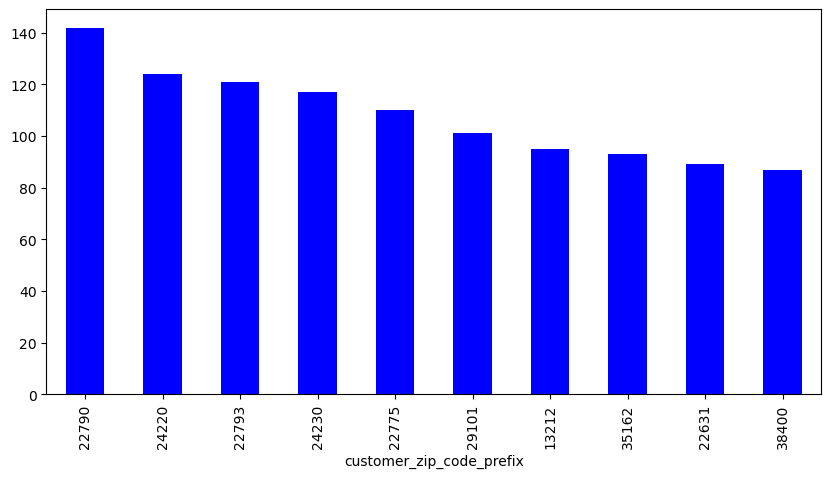

In [14]:
df_costumer["customer_zip_code_prefix"].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='blue', zorder=2, width=0.5)

## Carte de la répartition d'un échantillon des clients sur le globe 

In [15]:
import folium
from folium.plugins import HeatMap

# Compter le nombre de personnes par coordonnée
df_merged['count'] = df_merged.groupby(['geolocation_lat', 'geolocation_lng'])['customer_id'].transform('count')

# Créer une carte centrée sur le Brésil
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Créer un sous-dataframe sans NaN dans les colonnes geolocation_lat et geolocation_lng
df_merged_clean = df_merged.dropna(subset=['geolocation_lat', 'geolocation_lng'])

# Ajouter les points de chaleur à la carte
heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['count']] for index, row in df_merged_clean.iterrows()]
HeatMap(heat_data).add_to(m)

# Afficher la carte
m.save('heatmap.html')
m

### Majorité Sud-Amérique 

In [16]:
df_costumer["customer_unique_id"].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

In [17]:
df_costumer["customer_id"].value_counts()

customer_id
06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: count, Length: 99441, dtype: int64

## df_orders

In [18]:
# Analyse descriptive du dataframe df_orders
print(df_orders.describe())

# Informations sur le dataframe df_orders
print(df_orders.info())

              index
count  99441.000000
mean   49720.000000
std    28706.288396
min        0.000000
25%    24860.000000
50%    49720.000000
75%    74580.000000
max    99440.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99281 non-null  object
 6   order_delivered_carrier_date   97658 non-null  object
 7   order_delivered_customer_date  96476 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB
None


In [19]:
df_orders

index                          order_id  \
0          0  e481f51cbdc54678b7cc49136f2d6af7   
1          1  53cdb2fc8bc7dce0b6741e2150273451   
2          2  47770eb9100c2d0c44946d9cf07ec65d   
3          3  949d5b44dbf5de918fe9c16f97b45f8a   
4          4  ad21c59c0840e6cb83a9ceb5573f8159   
...      ...                               ...   
99436  99436  9c5dedf39a927c1b2549525ed64a053c   
99437  99437  63943bddc261676b46f01ca7ac2f7bd8   
99438  99438  83c1379a015df1e13d02aae0204711ab   
99439  99439  11c177c8e97725db2631073c19f07b62   
99440  99440  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4      8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                 ...          ...                      ...   
99436  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
99437  1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
99438  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
99439  b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
99440  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 22:20:29          2018-02-14 19:46:34   
...                    ...                          ...   
99436  2017-03-09 09:54:05          2017-03-10 11:18:03   
99437  2018-02-06 13:10:37          2018-02-07 23:22:42   
99438  2017-08-27 15:04:16          2017-08-28 20:52:26   
99439  2018-01-08 21:36:21          2018-01-12 15:35:03   
99440  2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  
0               2017-10-10 21:25:13           2017-10-18 00:00:00  
1               2018-08-07 15:27:45           2018-08-13 00:00:00  
2               2018-08-17 18:06:29           2018-09-04 00:00:00  
3               2017-12-02 00:28:42           2017-12-15 00:00:00  
4               2018-02-16 18:17:02           2018-02-26 00:00:00  
...                             ...                           ...  
99436           2017-03-17 15:08:01           2017-03-28 00:00:00  
99437           2018-02-28 17:37:56           2018-03-02 00:00:00  
99438           2017-09-21 11:24:17           2017-09-27 00:00:00  
99439           2018-01-25 23:32:54           2018-02-15 00:00:00  
99440           2018-03-16 13:08:30           2018-04-03 00:00:00  

[99441 rows x 9 columns]

In [20]:
df_orders["order_id"].value_counts()    

order_id
e481f51cbdc54678b7cc49136f2d6af7    1
f01059d0d674e1282df4e8fbbe015aa2    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
917399e96f92268dfa2c0351b1b75fba    1
                                   ..
6b8986012d61963295ffa3ea869aff86    1
be879f757debd3b384b540daa6ddd97e    1
ac3ce7eda1246f39509a505242fcc169    1
e801a93b3904ca9e8350f176a037047b    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: count, Length: 99441, dtype: int64

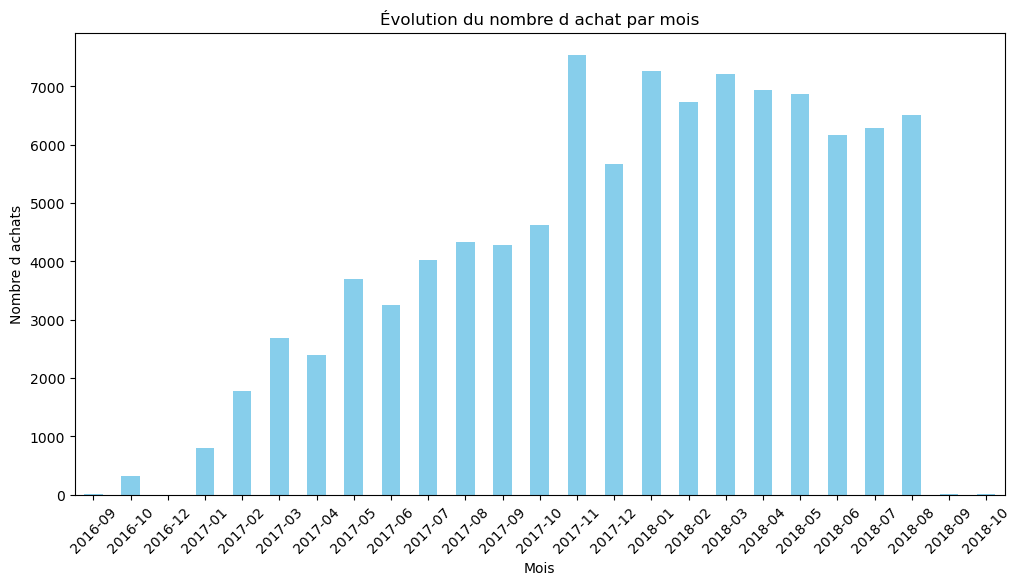

In [21]:
# Convertir la colonne review_creation_date en datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Extraire le mois et l'année
df_orders['year_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

# Compter le nombre de commentaires par mois
monthly_reviews = df_orders['year_month'].value_counts().sort_index()

# Tracer le graphique
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='bar', color='skyblue')
plt.title('Évolution du nombre d achat par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d achats')
plt.xticks(rotation=45)
plt.show()

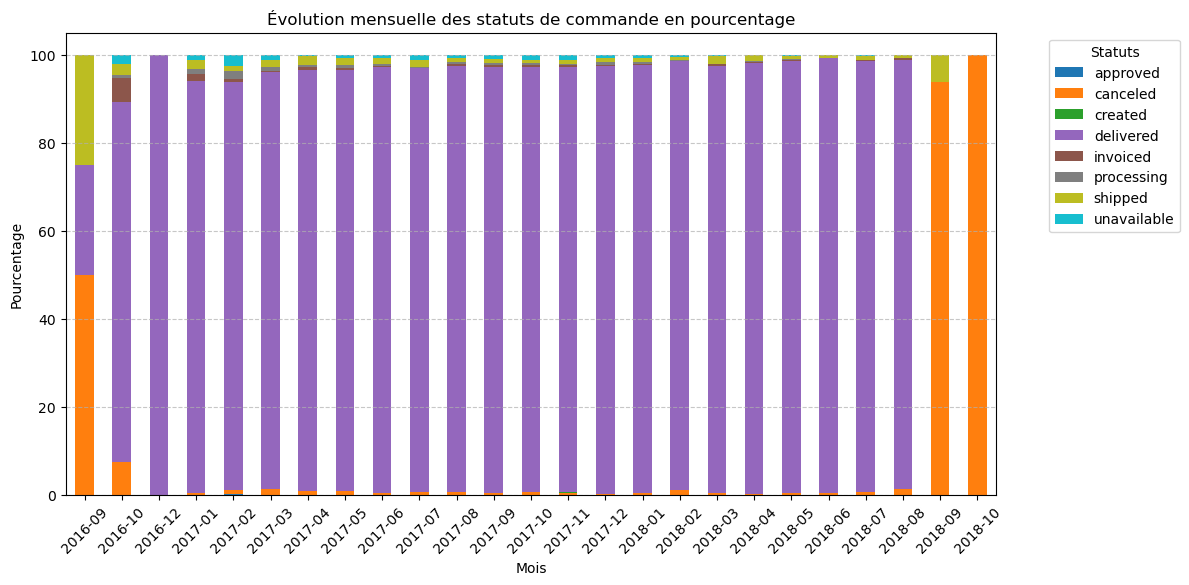

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la colonne de date en datetime si ce n'est pas déjà fait
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])

# Extraire l'année et le mois
df_orders["year_month"] = df_orders["order_purchase_timestamp"].dt.to_period("M")

# Compter les statuts par mois
status_counts = df_orders.groupby(["year_month", "order_status"]).size().unstack(fill_value=0)

# Calculer le pourcentage des statuts par mois
status_counts_percentage = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# Tracer le bar plot empilé
status_counts_percentage.plot(kind="bar", stacked=True, figsize=(12, 6), cmap="tab10")

# Personnalisation du graphique
plt.title("Évolution mensuelle des statuts de commande en pourcentage")
plt.xlabel("Mois")
plt.ylabel("Pourcentage")
plt.legend(title="Statuts", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [23]:
df_orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

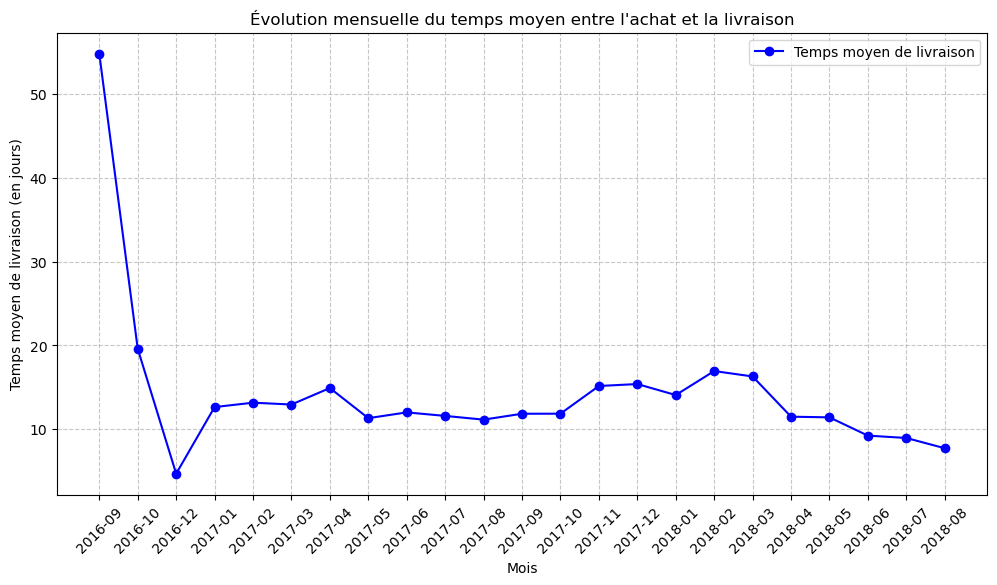

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir les colonnes de date en datetime
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])

# Filtrer les commandes livrées pour éviter les NaN
df_delivered = df_orders[df_orders["order_status"] == "delivered"].copy()

# Calculer la différence de temps entre achat et livraison
df_delivered["delivery_time"] = df_delivered["order_delivered_customer_date"] - df_delivered["order_purchase_timestamp"]

# Extraire l'année et le mois pour grouper les données
df_delivered["year_month"] = df_delivered["order_purchase_timestamp"].dt.to_period("M")

# Calculer la moyenne du temps de livraison par mois
mean_delivery_time_per_month = df_delivered.groupby("year_month")["delivery_time"].mean()

# Tracer l'évolution mensuelle du temps moyen de livraison
plt.figure(figsize=(12, 6))
plt.plot(mean_delivery_time_per_month.index.astype(str), 
         mean_delivery_time_per_month.dt.total_seconds() / 86400, 
         marker="o", linestyle="-", color="blue", label="Temps moyen de livraison")

# Personnalisation du graphique
plt.title("Évolution mensuelle du temps moyen entre l'achat et la livraison")
plt.xlabel("Mois")
plt.ylabel("Temps moyen de livraison (en jours)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


## df_order_reviews

In [25]:
df_order_reviews 

index                         review_id  \
0          0  7bc2406110b926393aa56f80a40eba40   
1          1  80e641a11e56f04c1ad469d5645fdfde   
2          2  228ce5500dc1d8e020d8d1322874b6f0   
3          3  e64fb393e7b32834bb789ff8bb30750e   
4          4  f7c4243c7fe1938f181bec41a392bdeb   
...      ...                               ...   
99219  99219  574ed12dd733e5fa530cfd4bbf39d7c9   
99220  99220  f3897127253a9592a73be9bdfdf4ed7a   
99221  99221  b3de70c89b1510c4cd3d0649fd302472   
99222  99222  1adeb9d84d72fe4e337617733eb85149   
99223  99223  efe49f1d6f951dd88b51e6ccd4cc548f   

                               order_id  review_score review_comment_title  \
0      73fc7af87114b39712e6da79b0a377eb             4                  NaN   
1      a548910a1c6147796b98fdf73dbeba33             5                  NaN   
2      f9e4b658b201a9f2ecdecbb34bed034b             5                  NaN   
3      658677c97b385a9be170737859d3511b             5                  NaN   
4      8e6bfb81e283fa7e4f11123a3fb894f1             5                  NaN   
...                                 ...           ...                  ...   
99219  2a8c23fee101d4d5662fa670396eb8da             5                  NaN   
99220  22ec9f0669f784db00fa86d035cf8602             5                  NaN   
99221  55d4004744368f5571d1f590031933e4             5                  NaN   
99222  7725825d039fc1f0ceb7635e3f7d9206             4                  NaN   
99223  90531360ecb1eec2a1fbb265a0db0508             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 8 columns]

In [26]:
df_order_reviews["review_comment_title"].value_counts()    

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

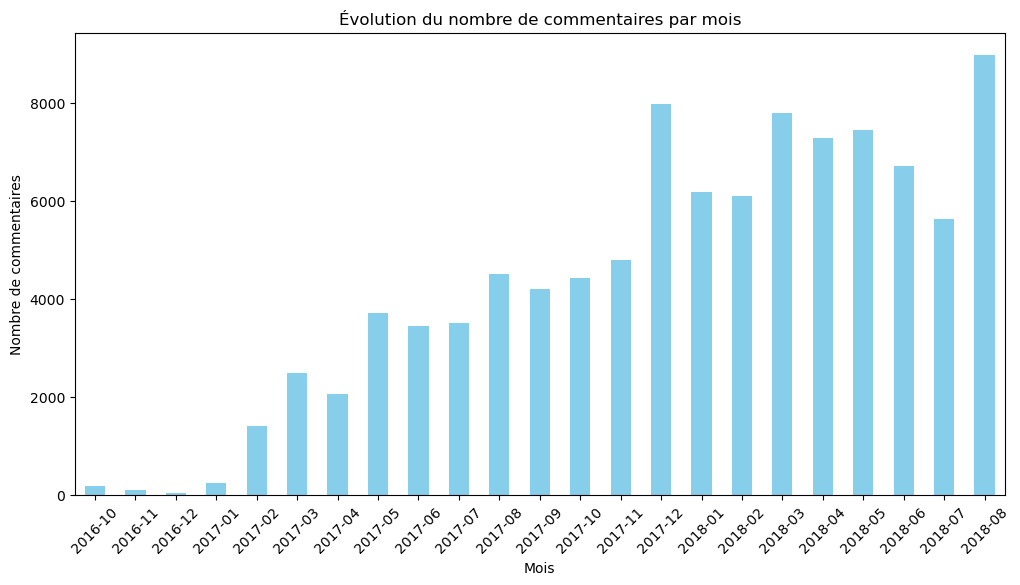

In [27]:
# Convertir la colonne review_creation_date en datetime
df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'])

# Extraire le mois et l'année
df_order_reviews['year_month'] = df_order_reviews['review_creation_date'].dt.to_period('M')

# Compter le nombre de commentaires par mois
monthly_reviews = df_order_reviews['year_month'].value_counts().sort_index()

# Tracer le graphique
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='bar', color='skyblue')
plt.title('Évolution du nombre de commentaires par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de commentaires')
plt.xticks(rotation=45)
plt.show()

In [28]:
df_order_reviews["review_id"].value_counts()    

review_id
7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
95e01591b0e69a2fab382b0c562d4e20    1
93611e0327d6a1769d1e68cf3caa242d    1
983c47de74278257f99c4b918fd380f1    1
ca475b77fcc618551ef9d516c3f61b88    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: count, Length: 98410, dtype: int64

In [29]:
df_order_reviews["order_id"].value_counts()    

order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: count, Length: 98673, dtype: int64

In [30]:
df_order_reviews["review_id"].isna().sum()

0

In [31]:
# Trouver les doublons dans la colonne 'review_id'
duplicated_reviews = df_order_reviews[df_order_reviews.duplicated(subset='review_id', keep=False)]

# Est ce que les doublons sont des lignes identiques ?
duplicated_reviews

index                         review_id  \
200      200  28642ce6250b94cc72bc85960aec6c62   
344      344  a0a641414ff718ca079b3967ef5c2495   
346      346  f4d74b17cd63ee35efa82cd2567de911   
360      360  ecbaf1fce7d2c09bfab46f89065afeaf   
393      393  6b1de94de0f4bd84dfc4136818242faa   
...      ...                               ...   
99108  99108  2c6c08892b83ba4c1be33037c2842294   
99124  99124  6ec93e77f444e0b1703740a69122e35d   
99164  99164  2afe63a67dfd99b3038f568fb47ee761   
99167  99167  017808d29fd1f942d97e50184dfb4c13   
99178  99178  44d1e9165ec54b1d89d33594856af859   

                               order_id  review_score review_comment_title  \
200    e239d280236cdd3c40cb2c033f681d1c             5                  NaN   
344    169d7e0fd71d624d306f132acd791cbe             5                  NaN   
346    f269e83a82f64baa3de97c2ebf3358f6             3                  NaN   
360    2451b9756f310d4cff5c7987b393870d             5                  NaN   
393    92acf87839903a94aeca0e5040d99acb             5                  NaN   
...                                 ...           ...                  ...   
99108  42ae1967f68c90bb325783ac55d761ce             4                  NaN   
99124  e1fdc6e9d1ca132377e862593a7c0bd4             5                  NaN   
99164  c5334d330e36d2a810a7a13c72e135ee             5                  NaN   
99167  b1461c8882153b5fe68307c46a506e39             5                  NaN   
99178  a7dbcf5043158d6fa72859eead2f3d10             4                  NaN   

                                  review_comment_message review_creation_date  \
200                                                  NaN           2018-03-25   
344                                                  NaN           2018-03-04   
346    A embalagem deixou a desejar, por pouco o prod...           2018-01-12   
360                                                  NaN           2017-07-27   
393                                                  NaN           2018-02-16   
...                                                  ...                  ...   
99108  Chegou um pouco amassada, mas nada de mais, e ...           2017-07-03   
99124              Vendedor compromisso do vou o cliente           2017-10-07   
99164  Muito bom, produto conforme anunciado, entrega...           2018-03-03   
99167                                                NaN           2018-03-02   
99178                                                NaN           2017-05-24   

      review_answer_timestamp year_month  
200       2018-03-25 21:03:02    2018-03  
344       2018-03-06 20:12:53    2018-03  
346       2018-01-13 18:46:10    2018-01  
360       2017-07-28 16:57:18    2017-07  
393       2018-02-19 19:04:21    2018-02  
...                       ...        ...  
99108     2017-07-05 19:06:59    2017-07  
99124     2017-10-07 19:47:11    2017-10  
99164     2018-03-04 22:56:47    2018-03  
99167     2018-03-05 01:43:30    2018-03  
99178     2017-05-24 23:15:21    2017-05  

[1603 rows x 9 columns]

In [32]:
duplicated_reviews[duplicated_reviews["review_id"] == "28642ce6250b94cc72bc85960aec6c62"]

index                         review_id  \
200      200  28642ce6250b94cc72bc85960aec6c62   
58385  58385  28642ce6250b94cc72bc85960aec6c62   

                               order_id  review_score review_comment_title  \
200    e239d280236cdd3c40cb2c033f681d1c             5                  NaN   
58385  bc42a955f289870d5789e6e437206300             5                  NaN   

      review_comment_message review_creation_date review_answer_timestamp  \
200                      NaN           2018-03-25     2018-03-25 21:03:02   
58385                    NaN           2018-03-25     2018-03-25 21:03:02   

      year_month  
200      2018-03  
58385    2018-03

### est ce que un avis = un acheteur ?

In [33]:
# Filtrer les lignes avec un commentaire écrit (hors NaN)
reviews_with_comments = df_order_reviews[df_order_reviews["review_comment_message"].notna()]
average_score_with_comments = reviews_with_comments["review_score"].mean()

# Filtrer les lignes sans commentaire (NaN)
reviews_without_comments = df_order_reviews[df_order_reviews["review_comment_message"].isna()]
average_score_without_comments = reviews_without_comments["review_score"].mean()

average_score_with_comments, average_score_without_comments

(3.66986358200942, 4.379470187305784)

#### les personnes commentants des avis ont généralement eu une mauvaise expérience

### Merge de df_orders et df_merge (df_constumer+df_geoloca)

In [34]:
# Sélectionner uniquement les colonnes nécessaires de df_orders
df_orders_filtered = df_orders[["order_id", "customer_id", "order_status", "order_purchase_timestamp", "order_delivered_customer_date"]]
df_merged_filtered = df_merged[["customer_unique_id", "customer_id", "customer_state", "geolocation_lat", "geolocation_lng"]]

# Effectuer le merge en left join sur order_id et customer_id
df_merge_2 = df_merged_filtered.merge(df_orders_filtered, on="customer_id", how="inner")

# Afficher les premières lignes du dataframe fusionné
df_merge_2

customer_unique_id                       customer_id  \
0      861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1      290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2      060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3      259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4      345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   
...                                 ...                               ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f   
99437  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8   
99438  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e   
99439  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9   
99440  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8   

      customer_state  geolocation_lat  geolocation_lng  \
0             BRÉSIL       -20.531935       -47.399447   
1             BRÉSIL       -23.556812       -46.657135   
2             BRÉSIL       -23.545621       -46.639292   
3             BRÉSIL       -23.535324       -46.190667   
4             BRÉSIL       -22.898536       -47.063125   
...              ...              ...              ...   
99436         BRÉSIL       -23.545621       -46.639292   
99437         BRÉSIL       -23.606387       -46.768741   
99438         BRÉSIL        -3.725240       -38.545775   
99439         BRÉSIL       -29.910053       -51.169227   
99440         BRÉSIL       -23.605230       -46.907618   

                               order_id order_status order_purchase_timestamp  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1      29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2      b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3      951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4      6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   
...                                 ...          ...                      ...   
99436  6760e20addcf0121e9d58f2f1ff14298    delivered      2018-04-07 15:48:17   
99437  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered      2018-04-04 08:20:22   
99438  fed4434add09a6f332ea398efd656a5c    delivered      2018-04-08 20:11:50   
99439  e31ec91cea1ecf97797787471f98a8c2    delivered      2017-11-03 21:08:33   
99440  28db69209a75e59f20ccbb5c36a20b90    delivered      2017-12-19 14:27:23   

      order_delivered_customer_date  
0               2017-05-25 10:35:35  
1               2018-01-29 12:41:19  
2               2018-06-14 17:58:51  
3               2018-03-28 16:04:25  
4               2018-08-09 20:55:48  
...                             ...  
99436           2018-04-13 20:06:37  
99437           2018-04-11 18:54:45  
99438           2018-05-09 19:03:15  
99439           2017-11-16 19:58:39  
99440           2017-12-26 18:42:36  

[99441 rows x 9 columns]

### Merge de df_order_pymts et df_merge2 (df_constumer+df_geoloca+df_orders)

In [35]:
df_order_pymts_filtered = df_order_pymts[["order_id", "payment_value"]]

In [36]:
df_order_pymts_filtered["order_id"].value_counts()

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99440, dtype: int64

In [37]:
# Calculer la somme totale des paiements par order_id
df_payments_sum = df_order_pymts_filtered.groupby("order_id")["payment_value"].sum().reset_index()

# Renommer la colonne pour plus de clarté
df_payments_sum.columns = ["order_id", "total_payment_value"]

# Afficher les premières lignes
df_payments_sum

order_id  total_payment_value
0      00010242fe8c5a6d1ba2dd792cb16214                72.19
1      00018f77f2f0320c557190d7a144bdd3               259.83
2      000229ec398224ef6ca0657da4fc703e               216.87
3      00024acbcdf0a6daa1e931b038114c75                25.78
4      00042b26cf59d7ce69dfabb4e55b4fd9               218.04
...                                 ...                  ...
99435  fffc94f6ce00a00581880bf54a75a037               343.40
99436  fffcd46ef2263f404302a634eb57f7eb               386.53
99437  fffce4705a9662cd70adb13d4a31832d               116.85
99438  fffe18544ffabc95dfada21779c9644f                64.71
99439  fffe41c64501cc87c801fd61db3f6244                55.79

[99440 rows x 2 columns]

In [38]:
# Effectuer le merge en inner join sur order_id
df_merge_3 = df_merge_2.merge(df_payments_sum, on="order_id", how="inner")

# Afficher les premières lignes du dataframe fusionné
df_merge_3

customer_unique_id                       customer_id  \
0      861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1      290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2      060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3      259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4      345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   
...                                 ...                               ...   
99435  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f   
99436  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8   
99437  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e   
99438  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9   
99439  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8   

      customer_state  geolocation_lat  geolocation_lng  \
0             BRÉSIL       -20.531935       -47.399447   
1             BRÉSIL       -23.556812       -46.657135   
2             BRÉSIL       -23.545621       -46.639292   
3             BRÉSIL       -23.535324       -46.190667   
4             BRÉSIL       -22.898536       -47.063125   
...              ...              ...              ...   
99435         BRÉSIL       -23.545621       -46.639292   
99436         BRÉSIL       -23.606387       -46.768741   
99437         BRÉSIL        -3.725240       -38.545775   
99438         BRÉSIL       -29.910053       -51.169227   
99439         BRÉSIL       -23.605230       -46.907618   

                               order_id order_status order_purchase_timestamp  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1      29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2      b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3      951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4      6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   
...                                 ...          ...                      ...   
99435  6760e20addcf0121e9d58f2f1ff14298    delivered      2018-04-07 15:48:17   
99436  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered      2018-04-04 08:20:22   
99437  fed4434add09a6f332ea398efd656a5c    delivered      2018-04-08 20:11:50   
99438  e31ec91cea1ecf97797787471f98a8c2    delivered      2017-11-03 21:08:33   
99439  28db69209a75e59f20ccbb5c36a20b90    delivered      2017-12-19 14:27:23   

      order_delivered_customer_date  total_payment_value  
0               2017-05-25 10:35:35               146.87  
1               2018-01-29 12:41:19               335.48  
2               2018-06-14 17:58:51               157.73  
3               2018-03-28 16:04:25               173.30  
4               2018-08-09 20:55:48               252.25  
...                             ...                  ...  
99435           2018-04-13 20:06:37                88.78  
99436           2018-04-11 18:54:45               129.06  
99437           2018-05-09 19:03:15                56.04  
99438           2017-11-16 19:58:39               711.07  
99439           2017-12-26 18:42:36                21.77  

[99440 rows x 10 columns]

In [39]:
df_items.tail(5)

index                          order_id  order_item_id  \
112645  112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  112648  fffe18544ffabc95dfada21779c9644f              1   
112649  112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79

In [40]:
df_orders_items.tail(5)

index                          order_id  order_item_id  \
112645  112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  112648  fffe18544ffabc95dfada21779c9644f              1   
112649  112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79

In [41]:
df_pymts.tail(5)

index                          order_id  payment_sequential  \
103881  103881  0406037ad97740d563a178ecc7a2075c                   1   
103882  103882  7b905861d7c825891d6347454ea7863f                   1   
103883  103883  32609bbb3dd69b3c066a6860554a77bf                   1   
103884  103884  b8b61059626efa996a60be9bb9320e10                   1   
103885  103885  28bbae6599b09d39ca406b747b6632b1                   1   

       payment_type  payment_installments  payment_value  
103881       boleto                     1         363.31  
103882  credit_card                     2          96.80  
103883  credit_card                     1          47.77  
103884  credit_card                     5         369.54  
103885       boleto                     1         191.58

In [42]:
df_order_pymts.tail(5)

index                          order_id  payment_sequential  \
103881  103881  0406037ad97740d563a178ecc7a2075c                   1   
103882  103882  7b905861d7c825891d6347454ea7863f                   1   
103883  103883  32609bbb3dd69b3c066a6860554a77bf                   1   
103884  103884  b8b61059626efa996a60be9bb9320e10                   1   
103885  103885  28bbae6599b09d39ca406b747b6632b1                   1   

       payment_type  payment_installments  payment_value  
103881       boleto                     1         363.31  
103882  credit_card                     2          96.80  
103883  credit_card                     1          47.77  
103884  credit_card                     5         369.54  
103885       boleto                     1         191.58

In [43]:
df_reviews.tail(5)

index                         review_id  \
99219  99219  574ed12dd733e5fa530cfd4bbf39d7c9   
99220  99220  f3897127253a9592a73be9bdfdf4ed7a   
99221  99221  b3de70c89b1510c4cd3d0649fd302472   
99222  99222  1adeb9d84d72fe4e337617733eb85149   
99223  99223  efe49f1d6f951dd88b51e6ccd4cc548f   

                               order_id  review_score review_comment_title  \
99219  2a8c23fee101d4d5662fa670396eb8da             5                  NaN   
99220  22ec9f0669f784db00fa86d035cf8602             5                  NaN   
99221  55d4004744368f5571d1f590031933e4             5                  NaN   
99222  7725825d039fc1f0ceb7635e3f7d9206             4                  NaN   
99223  90531360ecb1eec2a1fbb265a0db0508             1                  NaN   

                                  review_comment_message review_creation_date  \
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49

In [44]:
df_order_reviews.tail(5)

index                         review_id  \
99219  99219  574ed12dd733e5fa530cfd4bbf39d7c9   
99220  99220  f3897127253a9592a73be9bdfdf4ed7a   
99221  99221  b3de70c89b1510c4cd3d0649fd302472   
99222  99222  1adeb9d84d72fe4e337617733eb85149   
99223  99223  efe49f1d6f951dd88b51e6ccd4cc548f   

                               order_id  review_score review_comment_title  \
99219  2a8c23fee101d4d5662fa670396eb8da             5                  NaN   
99220  22ec9f0669f784db00fa86d035cf8602             5                  NaN   
99221  55d4004744368f5571d1f590031933e4             5                  NaN   
99222  7725825d039fc1f0ceb7635e3f7d9206             4                  NaN   
99223  90531360ecb1eec2a1fbb265a0db0508             1                  NaN   

                                  review_comment_message review_creation_date  \
99219                                                NaN           2018-07-07   
99220                                                NaN           2017-12-09   
99221  Excelente mochila, entrega super rápida. Super...           2018-03-22   
99222                                                NaN           2018-07-01   
99223  meu produto chegou e ja tenho que devolver, po...           2017-07-03   

      review_answer_timestamp year_month  
99219     2018-07-14 17:18:30    2018-07  
99220     2017-12-11 20:06:42    2017-12  
99221     2018-03-23 09:10:43    2018-03  
99222     2018-07-02 12:59:13    2018-07  
99223     2017-07-03 21:01:49    2017-07

### j'en conclue que les df,df_pymts et df_order_pymts sont similaires tous comme df_order_reviews et df_reviews et items

## Merge de df_order_items et df_merge_3

In [45]:
df_sellers

index                         seller_id  seller_zip_code_prefix  \
0         0  3442f8959a84dea7ee197c632cb2df15                   13023   
1         1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2         2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3         3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4         4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...     ...                               ...                     ...   
3090   3090  98dddbc4601dd4443ca174359b237166                   87111   
3091   3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092   3092  74871d19219c7d518d0090283e03c137                    4650   
3093   3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094   3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 5 columns]

In [46]:
# Remplacer les abréviations des états par les noms des pays en français et en majuscules
df_sellers['seller_state'] = df_sellers['seller_state'].map(state_to_country)

# Afficher les premières lignes du dataframe pour vérifier la transformation
print(df_sellers.head())

   index                         seller_id  seller_zip_code_prefix  \
0      0  3442f8959a84dea7ee197c632cb2df15                   13023   
1      1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2      2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3      3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4      4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas       BRÉSIL  
1         mogi guacu       BRÉSIL  
2     rio de janeiro       BRÉSIL  
3          sao paulo       BRÉSIL  
4  braganca paulista       BRÉSIL  


In [47]:
df_orders_items

index                          order_id  order_item_id  \
0            0  00010242fe8c5a6d1ba2dd792cb16214              1   
1            1  00018f77f2f0320c557190d7a144bdd3              1   
2            2  000229ec398224ef6ca0657da4fc703e              1   
3            3  00024acbcdf0a6daa1e931b038114c75              1   
4            4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
...        ...                               ...            ...   
112645  112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  112648  fffe18544ffabc95dfada21779c9644f              1   
112649  112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 8 columns]

In [48]:
# Effectuer le merge en inner join sur order_id
df_sellers_filtered = df_sellers[["seller_id", "seller_state"]]
df_orders_items = df_orders_items.merge(df_sellers_filtered, on="seller_id", how="left")

# Afficher les premières lignes du dataframe fusionné
df_orders_items

index                          order_id  order_item_id  \
0            0  00010242fe8c5a6d1ba2dd792cb16214              1   
1            1  00018f77f2f0320c557190d7a144bdd3              1   
2            2  000229ec398224ef6ca0657da4fc703e              1   
3            3  00024acbcdf0a6daa1e931b038114c75              1   
4            4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
...        ...                               ...            ...   
112645  112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  112648  fffe18544ffabc95dfada21779c9644f              1   
112649  112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value seller_state  
0       2017-09-19 09:45:35   58.90          13.29       BRÉSIL  
1       2017-05-03 11:05:13  239.90          19.93       BRÉSIL  
2       2018-01-18 14:48:30  199.00          17.87       BRÉSIL  
3       2018-08-15 10:10:18   12.99          12.79       BRÉSIL  
4       2017-02-13 13:57:51  199.90          18.14       BRÉSIL  
...                     ...     ...            ...          ...  
112645  2018-05-02 04:11:01  299.99          43.41       BRÉSIL  
112646  2018-07-20 04:31:48  350.00          36.53       BRÉSIL  
112647  2017-10-30 17:14:25   99.90          16.95       BRÉSIL  
112648  2017-08-21 00:04:32   55.99           8.72       BRÉSIL  
112649  2018-06-12 17:10:13   43.00          12.79       BRÉSIL  

[112650 rows x 9 columns]

In [49]:
df_orders_items["order_id"].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [50]:
df_products

index                        product_id  \
0          0  1e9e8ef04dbcff4541ed26657ea517e5   
1          1  3aa071139cb16b67ca9e5dea641aaa2f   
2          2  96bd76ec8810374ed1b65e291975717f   
3          3  cef67bcfe19066a932b7673e239eb23d   
4          4  9dc1a7de274444849c219cff195d0b71   
...      ...                               ...   
32946  32946  a0b7d5a992ccda646f2d34e418fff5a0   
32947  32947  bf4538d88321d0fd4412a93c974510e6   
32948  32948  9a7c6041fa9592d9d9ef6cfe62a71f8c   
32949  32949  83808703fc0706a22e264b9d75f04a2e   
32950  32950  106392145fca363410d287a815be6de4   

                   product_category_name  product_name_lenght  \
0                             perfumaria                 40.0   
1                                  artes                 44.0   
2                          esporte_lazer                 46.0   
3                                  bebes                 27.0   
4                  utilidades_domesticas                 37.0   
...                                  ...                  ...   
32946                   moveis_decoracao                 45.0   
32947  construcao_ferramentas_iluminacao                 41.0   
32948                    cama_mesa_banho                 50.0   
32949             informatica_acessorios                 60.0   
32950                    cama_mesa_banho                 58.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32946                        67.0                 2.0           12300.0   
32947                       971.0                 1.0            1700.0   
32948                       799.0                 1.0            1400.0   
32949                       156.0                 2.0             700.0   
32950                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  
0                   16.0               10.0              14.0  
1                   30.0               18.0              20.0  
2                   18.0                9.0              15.0  
3                   26.0                4.0              26.0  
4                   20.0               17.0              13.0  
...                  ...                ...               ...  
32946               40.0               40.0              40.0  
32947               16.0               19.0              16.0  
32948               27.0                7.0              27.0  
32949               31.0               13.0              20.0  
32950               12.0                2.0               7.0  

[32951 rows x 10 columns]

In [51]:
# Effectuer le merge en inner join sur order_id
df_products = df_products.merge(df_translation, on="product_category_name", how="left")

# Afficher les premières lignes du dataframe fusionné
df_products.drop(columns=["product_category_name"], inplace=True)

In [52]:
# Effectuer le merge en inner join sur order_id
df_orders_items_merged = df_orders_items.merge(df_products, on="product_id", how="left")

# Afficher les premières lignes du dataframe fusionné
df_orders_items_merged.drop(columns=["index_y","index_x"], inplace=True)
df_orders_items_merged

index                          order_id  order_item_id  \
0            0  00010242fe8c5a6d1ba2dd792cb16214              1   
1            1  00018f77f2f0320c557190d7a144bdd3              1   
2            2  000229ec398224ef6ca0657da4fc703e              1   
3            3  00024acbcdf0a6daa1e931b038114c75              1   
4            4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
...        ...                               ...            ...   
112645  112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  112648  fffe18544ffabc95dfada21779c9644f              1   
112649  112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value seller_state  \
0       2017-09-19 09:45:35   58.90          13.29       BRÉSIL   
1       2017-05-03 11:05:13  239.90          19.93       BRÉSIL   
2       2018-01-18 14:48:30  199.00          17.87       BRÉSIL   
3       2018-08-15 10:10:18   12.99          12.79       BRÉSIL   
4       2017-02-13 13:57:51  199.90          18.14       BRÉSIL   
...                     ...     ...            ...          ...   
112645  2018-05-02 04:11:01  299.99          43.41       BRÉSIL   
112646  2018-07-20 04:31:48  350.00          36.53       BRÉSIL   
112647  2017-10-30 17:14:25   99.90          16.95       BRÉSIL   
112648  2017-08-21 00:04:32   55.99           8.72       BRÉSIL   
112649  2018-06-12 17:10:13   43.00          12.79       BRÉSIL   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      58.0                       598.0                 4.0   
1                      56.0                       239.0                 2.0   
2                      59.0                       695.0                 2.0   
3                      42.0                       480.0                 1.0   
4                      59.0                       409.0                 1.0   
...                     ...                         ...                 ...   
112645                 43.0                      1002.0                 3.0   
112646                 31.0                       232.0                 1.0   
112647                 43.0                       869.0                 1.0   
112648                 56.0                      1306.0                 1.0   
112649                 47.0                       511.0                 1.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  650.0               28.0                9.0   
1                30000.0               50.0               30.0   
2                 3050.0               33.0               13.0   
3                  200.0               16.0               10.0   
4                 3750.0               35.0               40.0   
...                  ...                ...                ...   
112645           10150.0               89.0        

In [53]:
df_orders_items_merged["order_id"].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [54]:
df_merge_3

customer_unique_id                       customer_id  \
0      861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1      290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2      060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3      259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4      345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   
...                                 ...                               ...   
99435  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f   
99436  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8   
99437  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e   
99438  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9   
99439  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8   

      customer_state  geolocation_lat  geolocation_lng  \
0             BRÉSIL       -20.531935       -47.399447   
1             BRÉSIL       -23.556812       -46.657135   
2             BRÉSIL       -23.545621       -46.639292   
3             BRÉSIL       -23.535324       -46.190667   
4             BRÉSIL       -22.898536       -47.063125   
...              ...              ...              ...   
99435         BRÉSIL       -23.545621       -46.639292   
99436         BRÉSIL       -23.606387       -46.768741   
99437         BRÉSIL        -3.725240       -38.545775   
99438         BRÉSIL       -29.910053       -51.169227   
99439         BRÉSIL       -23.605230       -46.907618   

                               order_id order_status order_purchase_timestamp  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1      29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2      b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3      951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4      6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   
...                                 ...          ...                      ...   
99435  6760e20addcf0121e9d58f2f1ff14298    delivered      2018-04-07 15:48:17   
99436  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered      2018-04-04 08:20:22   
99437  fed4434add09a6f332ea398efd656a5c    delivered      2018-04-08 20:11:50   
99438  e31ec91cea1ecf97797787471f98a8c2    delivered      2017-11-03 21:08:33   
99439  28db69209a75e59f20ccbb5c36a20b90    delivered      2017-12-19 14:27:23   

      order_delivered_customer_date  total_payment_value  
0               2017-05-25 10:35:35               146.87  
1               2018-01-29 12:41:19               335.48  
2               2018-06-14 17:58:51               157.73  
3               2018-03-28 16:04:25               173.30  
4               2018-08-09 20:55:48               252.25  
...                             ...                  ...  
99435           2018-04-13 20:06:37                88.78  
99436           2018-04-11 18:54:45               129.06  
99437           2018-05-09 19:03:15                56.04  
99438           2017-11-16 19:58:39               711.07  
99439           2017-12-26 18:42:36                21.77  

[99440 rows x 10 columns]

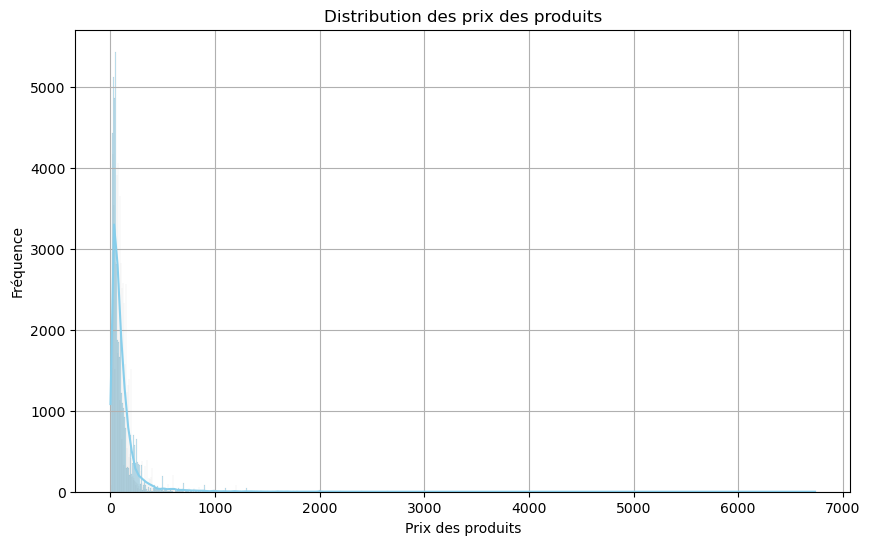

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df_orders_items_merged['price'], kde=True, color="skyblue")
plt.title("Distribution des prix des produits")
plt.xlabel("Prix des produits")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


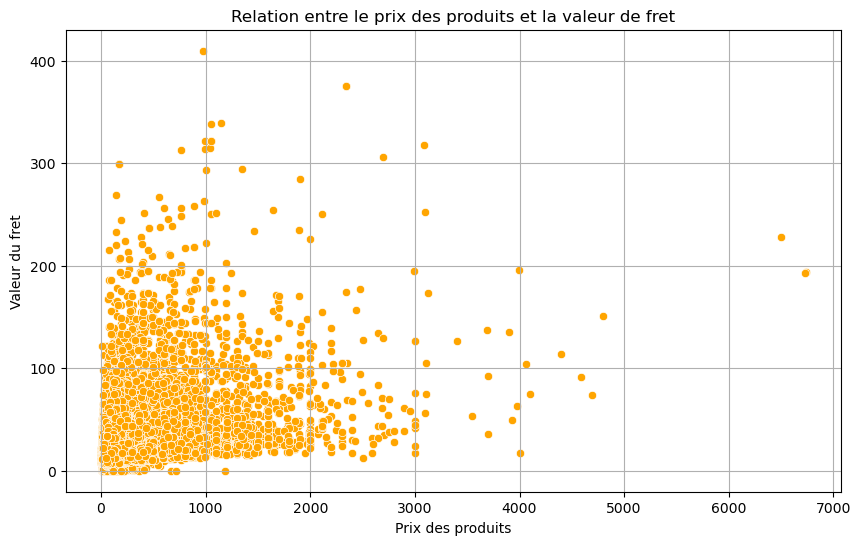

In [56]:
# Visualisation de la relation entre le prix des produits et la valeur de fret
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orders_items_merged, x='price', y='freight_value', color="orange")
plt.title("Relation entre le prix des produits et la valeur de fret")
plt.xlabel("Prix des produits")
plt.ylabel("Valeur du fret")
plt.grid(True)
plt.show()


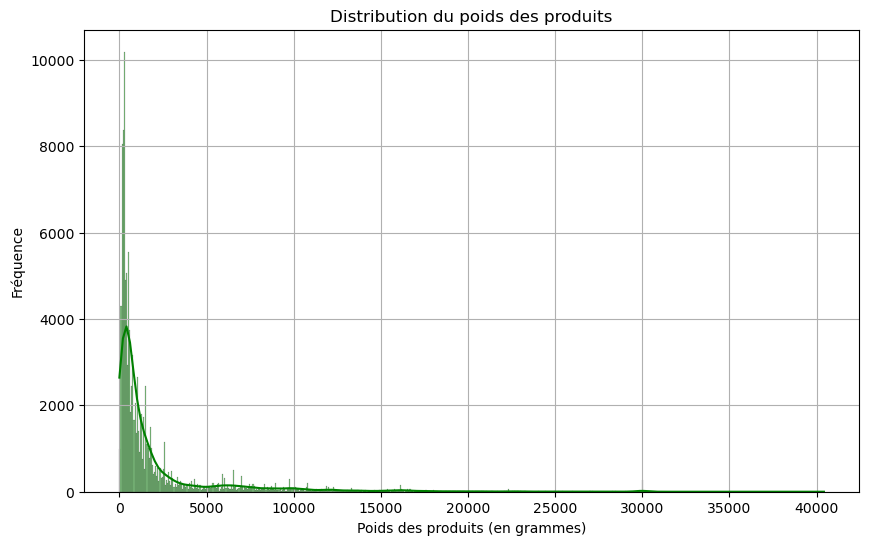

In [57]:
# Visualisation de la distribution du poids des produits
plt.figure(figsize=(10, 6))
sns.histplot(df_orders_items_merged['product_weight_g'], kde=True, color="green")
plt.title("Distribution du poids des produits")
plt.xlabel("Poids des produits (en grammes)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


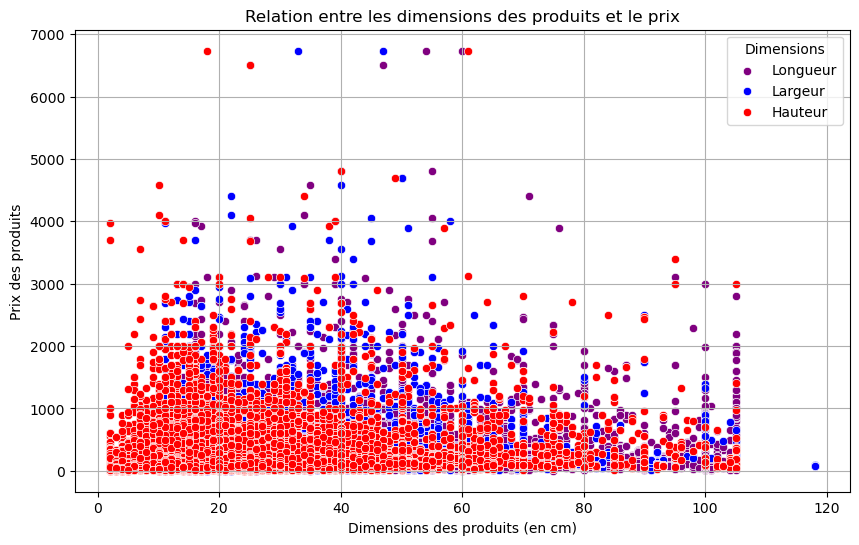

In [58]:
# Visualisation de la relation entre les dimensions du produit et le prix
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orders_items_merged, x='product_length_cm', y='price', color="purple", label="Longueur")
sns.scatterplot(data=df_orders_items_merged, x='product_width_cm', y='price', color="blue", label="Largeur")
sns.scatterplot(data=df_orders_items_merged, x='product_height_cm', y='price', color="red", label="Hauteur")
plt.title("Relation entre les dimensions des produits et le prix")
plt.xlabel("Dimensions des produits (en cm)")
plt.ylabel("Prix des produits")
plt.legend(title="Dimensions")
plt.grid(True)
plt.show()


In [59]:
# Effectuer le merge en inner join sur order_id
df_merge_4 = df_merge_3.merge(df_orders_items_merged, on="order_id", how="left")

# Afficher les premières lignes du dataframe fusionné
df_merge_4

customer_unique_id                       customer_id  \
0       861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1       290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2       060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3       259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4       345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   
...                                  ...                               ...   
113417  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f   
113418  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8   
113419  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e   
113420  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9   
113421  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8   

       customer_state  geolocation_lat  geolocation_lng  \
0              BRÉSIL       -20.531935       -47.399447   
1              BRÉSIL       -23.556812       -46.657135   
2              BRÉSIL       -23.545621       -46.639292   
3              BRÉSIL       -23.535324       -46.190667   
4              BRÉSIL       -22.898536       -47.063125   
...               ...              ...              ...   
113417         BRÉSIL       -23.545621       -46.639292   
113418         BRÉSIL       -23.606387       -46.768741   
113419         BRÉSIL        -3.725240       -38.545775   
113420         BRÉSIL       -29.910053       -51.169227   
113421         BRÉSIL       -23.605230       -46.907618   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       29150127e6685892b6eab3eec79f59c7    delivered   
2       b2059ed67ce144a36e2aa97d2c9e9ad2    delivered   
3       951670f92359f4fe4a63112aa7306eba    delivered   
4       6b7d50bd145f6fc7f33cebabd7e49d0f    delivered   
...                                  ...          ...   
113417  6760e20addcf0121e9d58f2f1ff14298    delivered   
113418  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered   
113419  fed4434add09a6f332ea398efd656a5c    delivered   
113420  e31ec91cea1ecf97797787471f98a8c2    delivered   
113421  28db69209a75e59f20ccbb5c36a20b90    delivered   

       order_purchase_timestamp order_delivered_customer_date  \
0           2017-05-16 15:05:35           2017-05-25 10:35:35   
1           2018-01-12 20:48:24           2018-01-29 12:41:19   
2           2018-05-19 16:07:45           2018-06-14 17:58:51   
3           2018-03-13 16:06:38           2018-03-28 16:04:25   
4           2018-07-29 09:51:30           2018-08-09 20:55:48   
...                         ...                           ...   
113417      2018-04-07 15:48:17           2018-04-13 20:06:37   
113418      2018-04-04 08:20:22           2018-04-11 18:54:45   
113419      2018-04-08 20:11:50           2018-05-09 19:03:15   
113420      2017-11-03 21:08:33           2017-11-16 19:58:39   
113421      2017-12-19 14:27:23           2017-12-26 18:42:36   

        total_payment_value  ...  freight_value  seller_state  \
0                    146.87  ...          21.88        BRÉSIL   
1                    335.48  ...          46.48        BRÉSIL   
2                    157.73  ...          17.79        BRÉSIL   
3                    173.30  ...          23.36        BRÉSIL   
4                    252.25  ...          22.25        BRÉSIL   
...                     ...  ...            ...           ...   
113417                88.78  ...          13.88        BRÉSIL   
113418               129.06  ...          14.16        BRÉSIL   
113419                56.04  ...          19.04        BRÉSIL   
113420               711.07  ...          22.07        BRÉSIL   
113421                21.77  ...           7.78        BRÉSIL   

       product_name_lenght product_description_lenght product_photos_qty  \
0                     41.0                     1141.0

In [60]:
df_merge_4.isna().sum()

customer_unique_id                  0
customer_id                         0
customer_state                      0
geolocation_lat                    70
geolocation_lng                    70
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3229
total_payment_value                 0
index                             775
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_state                      775
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
product_category_name_english    2402
dtype: int64

In [61]:
df_merge_4["order_id"].count()

113422

In [62]:
df_orders_items_merged["order_id"].count()

112650

## 2. Apply clustering methods: K-means, GMM, Hierarchical Clustering, DBSCAN.

### K-means

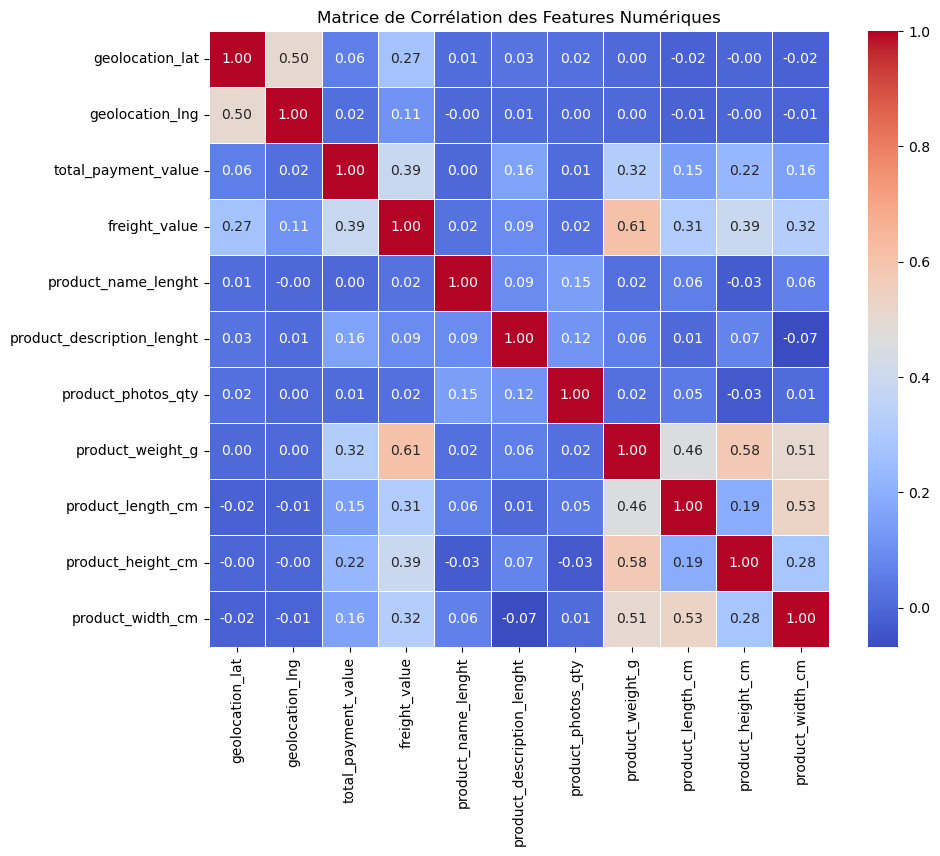

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des features numériques pour la corrélation
numeric_features = [
    "geolocation_lat", "geolocation_lng", "total_payment_value", 
    "freight_value", "product_name_lenght", "product_description_lenght", 
    "product_photos_qty", "product_weight_g", "product_length_cm", 
    "product_height_cm", "product_width_cm"
]

# Calcul de la matrice de corrélation
corr_matrix = df[numeric_features].corr()

# Affichage avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Features Numériques")
plt.show()


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split

# Charger le dataset
df = df_merge_4.copy()

# Sélectionner les colonnes pertinentes pour le clustering
# Supprimer les lignes avec des NaN dans les colonnes de features
df = df.dropna(subset=['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                       'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'total_payment_value'])

features = ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'total_payment_value']

# Extraire les données numériques
X = df[features]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


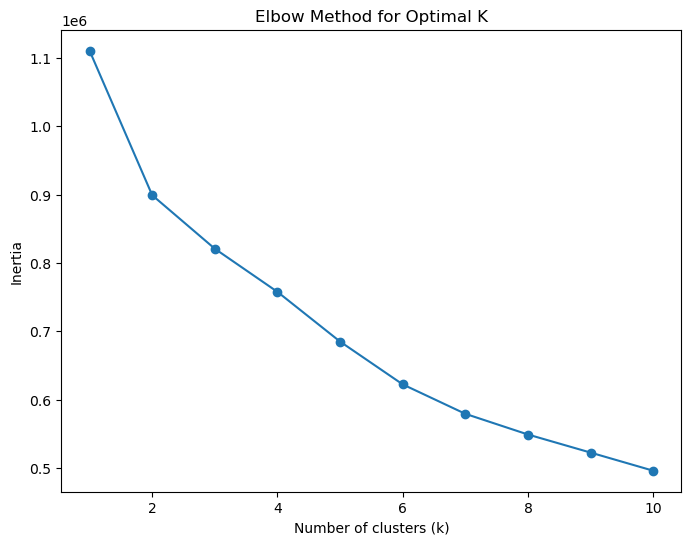

In [261]:
# Appliquer KMeans pour différentes valeurs de k (nombre de clusters)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer l'Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


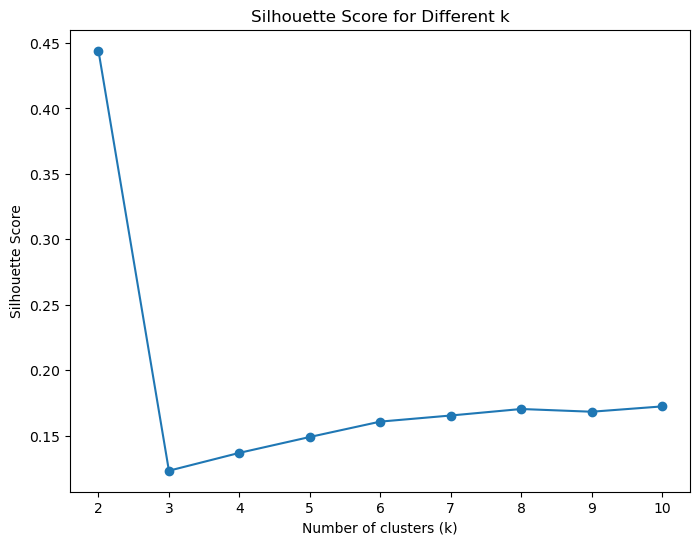

In [257]:
silhouette_scores = []

for k in k_range[1:10]:  # Commencer à partir de 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Tracer le score Silhouette
plt.figure(figsize=(8, 6))
plt.plot(k_range[1:10], silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


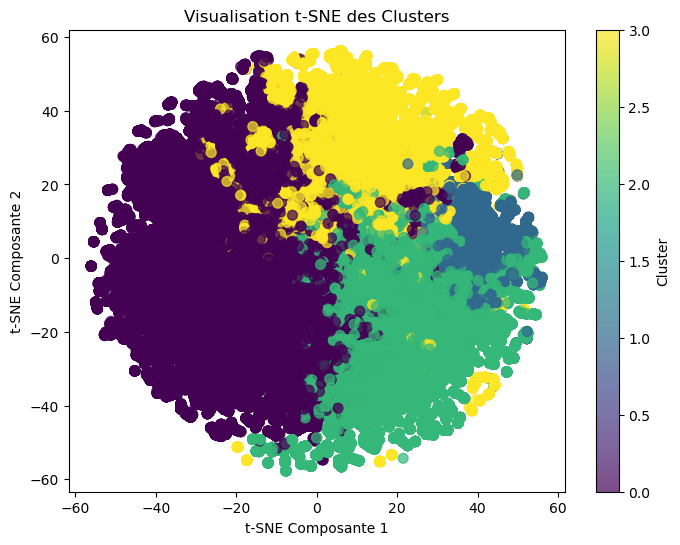

In [262]:
# Définition du nombre optimal de clusters
best_k = 4  # Basé sur l'Elbow Method et le Silhouette Score

# Application de KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Visualisation t-SNE des Clusters")
plt.xlabel("t-SNE Composante 1")
plt.ylabel("t-SNE Composante 2")
plt.show()

In [272]:
# Application de KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)  # AJOUTE les clusters au DataFrame

# Vérification que la colonne 'cluster' existe bien
print(df.head())  # Affiche les premières lignes pour s'assurer que tout va bien

# Calcul du score ARI pour K-Means
ari_score = adjusted_rand_score(df['cluster'], kmeans.labels_)
print(f"🔹 ARI Score pour K-Means : {ari_score:.4f}")

                 customer_unique_id                       customer_id  \
0  861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7   
1  290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77   
2  060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03   
3  259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3   
4  345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad   

  customer_state  geolocation_lat  geolocation_lng  \
0         BRÉSIL       -20.531935       -47.399447   
1         BRÉSIL       -23.556812       -46.657135   
2         BRÉSIL       -23.545621       -46.639292   
3         BRÉSIL       -23.535324       -46.190667   
4         BRÉSIL       -22.898536       -47.063125   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2

In [273]:
from sklearn.metrics import adjusted_rand_score

# Calcul du score ARI pour K-Means
ari_score = adjusted_rand_score(df['cluster'], kmeans.labels_)
print(f"🔹 ARI Score pour K-Means : {ari_score:.4f}")

# Évaluation de la fréquence de réentraînement avec Backward Evaluation
def evaluate_retraining_frequency(df, model, X_scaled, retrain_intervals=[3, 6, 12]):
    scores = {}
    for interval in retrain_intervals:
        # Simuler la mise à jour du modèle en utilisant seulement une fraction des données
        partial_data = X_scaled[:len(X_scaled)//interval, :]
        model.fit(partial_data)
        labels_new = model.predict(X_scaled)
        ari_new = adjusted_rand_score(df['cluster'], labels_new)
        scores[interval] = ari_new
        print(f"📊 ARI après réentraînement tous les {interval} mois : {ari_new:.4f}")
    
    # Recommandation de la meilleure fréquence
    best_interval = max(scores, key=scores.get)
    print(f"\n✅ Fréquence de mise à jour recommandée : tous les {best_interval} mois")

# Appliquer l'évaluation
evaluate_retraining_frequency(df, kmeans, X_scaled)


🔹 ARI Score pour K-Means : 1.0000
📊 ARI après réentraînement tous les 3 mois : 0.4112
📊 ARI après réentraînement tous les 6 mois : 0.5579
📊 ARI après réentraînement tous les 12 mois : 0.5774

✅ Fréquence de mise à jour recommandée : tous les 12 mois


### Hierarchical Clustering

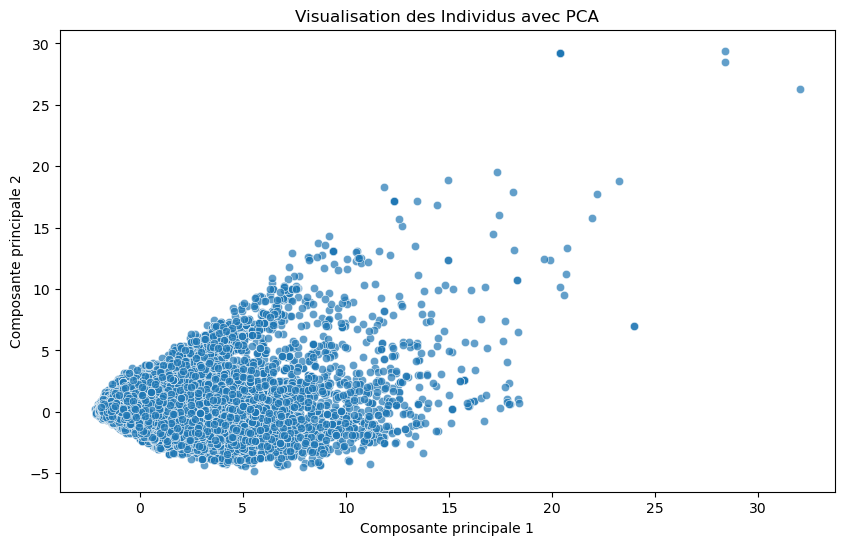

In [65]:
# Réduction de dimension avec PCA (2 composantes principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot des individus dans l'espace PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title("Visualisation des Individus avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


In [66]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance of each principal component
print("Explained variance ratio for each principal component:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_variance)


Explained variance ratio for each principal component: [0.31988107 0.14812561]
Cumulative explained variance: [0.31988107 0.46800668]


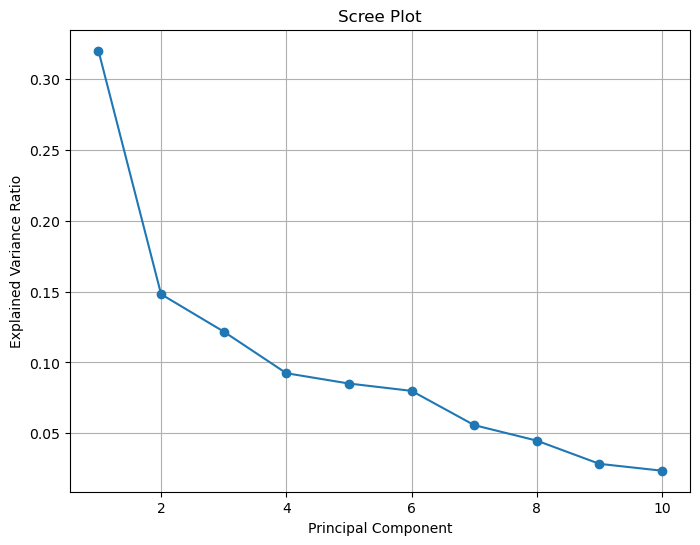

In [276]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


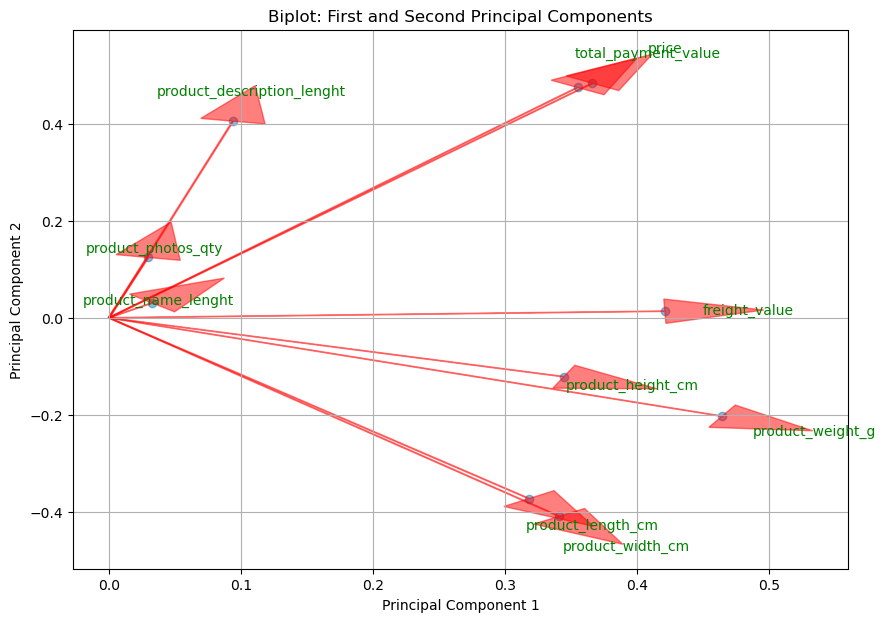

In [67]:
# Biplot: First two principal components and variable loadings
plt.figure(figsize=(10, 7))

# Scatter plot of the first two principal components
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.5, label="Samples")

# Add arrows for the variable loadings
for i in range(len(features)):  # Assuming 'features' is a list of feature names
    plt.arrow(0, 0, pca.components_[0][i], pca.components_[1][i], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0][i] * 1.15, pca.components_[1][i] * 1.15, features[i], color='g', ha='center', va='center')

plt.title("Biplot: First and Second Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [68]:
# Eigenvalues
eigenvalues = pca.explained_variance_

# Proportion of variance explained by each component
proportion_variance = eigenvalues / np.sum(eigenvalues)

# Print eigenvalues and proportion of variance explained
print("Eigenvalues:", eigenvalues)
print("Proportion of variance explained:", proportion_variance)


Eigenvalues: [3.19883947 1.48126947]
Proportion of variance explained: [0.6834968 0.3165032]


In [69]:
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative variance:", cumulative_variance)


Cumulative variance: [0.31988107 0.46800668]


In [70]:
# Retain only the first 4 principal components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Check the new shape of the reduced dataset
print("Shape of the reduced dataset:", X_pca.shape)


Shape of the reduced dataset: (111043, 4)


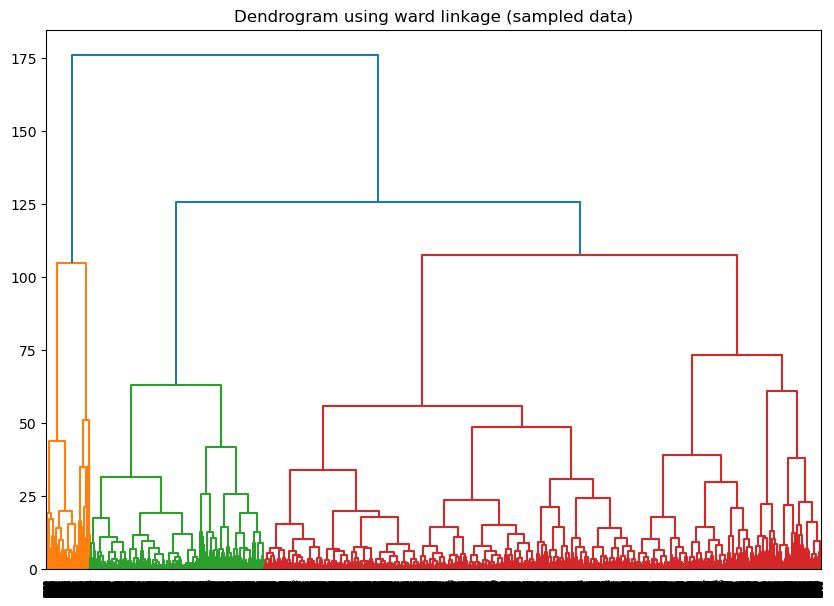

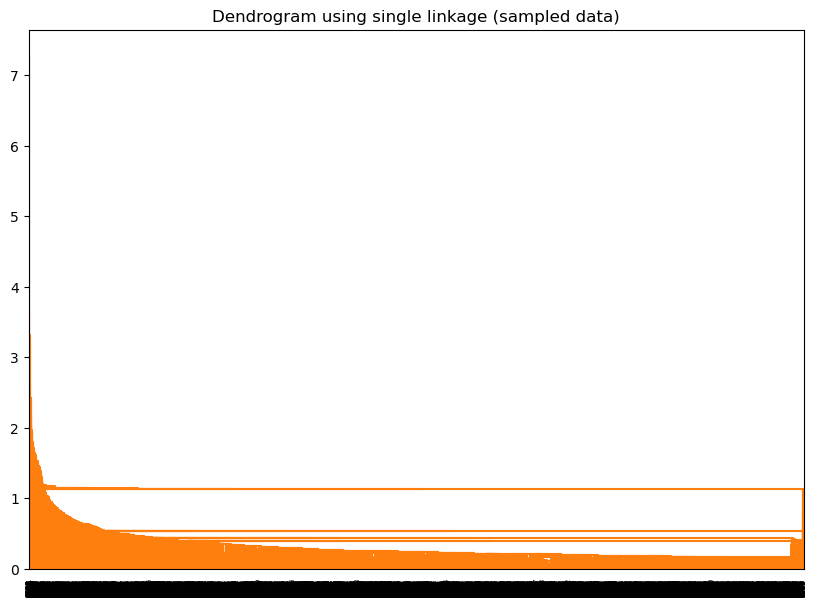

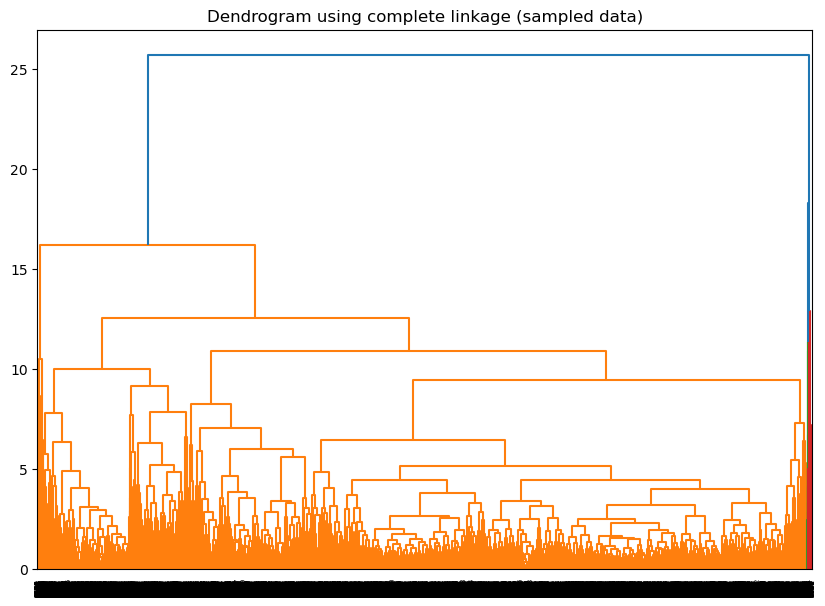

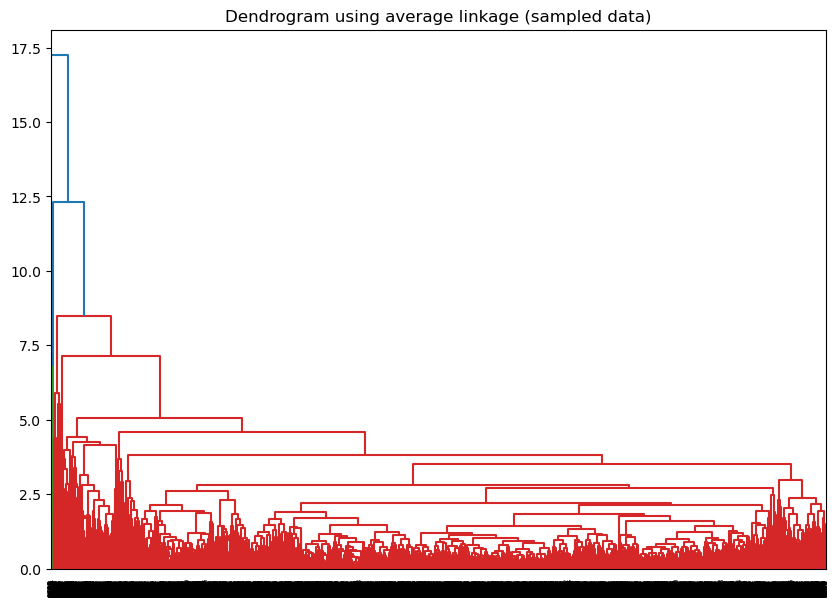

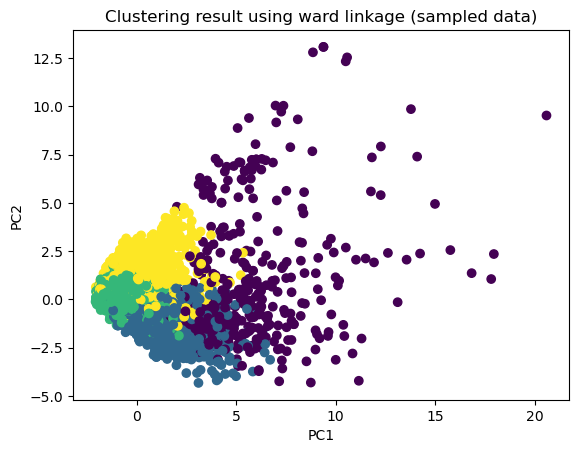

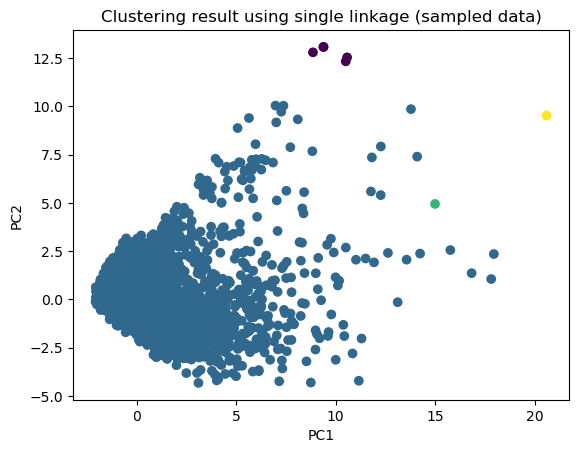

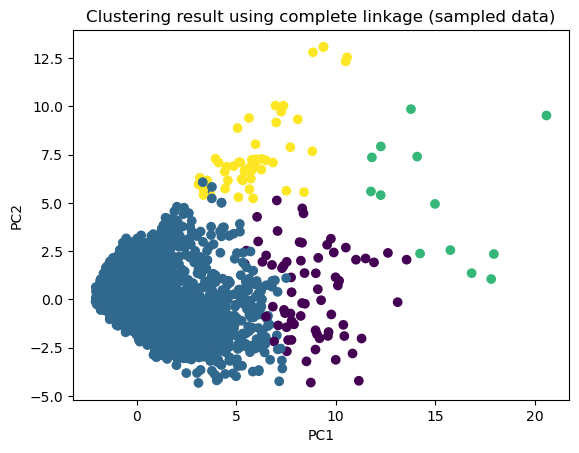

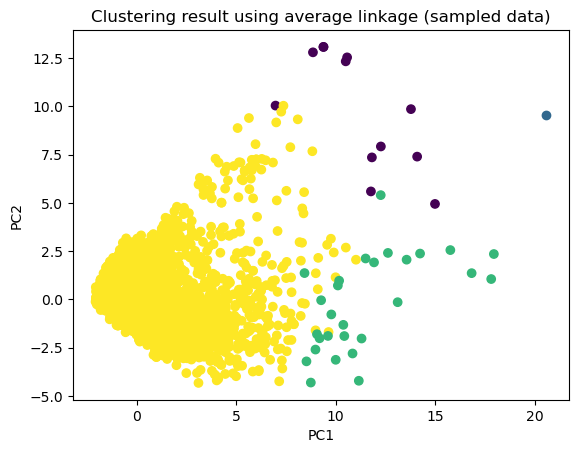

In [71]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Échantillonnage (par exemple 10,000 points sur 111,043)
sample_size = 10000
X_sampled = X_pca[np.random.choice(X_pca.shape[0], sample_size, replace=False)]

# Méthodes de linkage
linkage_methods = ['ward', 'single', 'complete', 'average']
for method in linkage_methods:
    Z = linkage(X_sampled, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f"Dendrogram using {method} linkage (sampled data)")
    plt.show()

# Découper en clusters (e.g., 4 clusters)
num_clusters = 4
clusters = {}
for method in linkage_methods:
    Z = linkage(X_sampled, method=method)
    clusters[method] = fcluster(Z, num_clusters, criterion='maxclust')

# Visualiser les clusters (PC1 vs PC2)
for method in linkage_methods:
    plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=clusters[method], cmap='viridis')
    plt.title(f"Clustering result using {method} linkage (sampled data)")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


In [297]:
# Step 1: Elbow Plot & Silhouette Score Optimization
def plot_elbow_silhouette(X):
    wcss = []
    silhouette_scores = []
    cluster_range = range(2, 11)  # Testing cluster numbers from 2 to 10
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    
    # Plot WCSS (Elbow Plot)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, wcss, marker='o')
    plt.title("Elbow Plot")
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    
    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title("Silhouette Score")
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


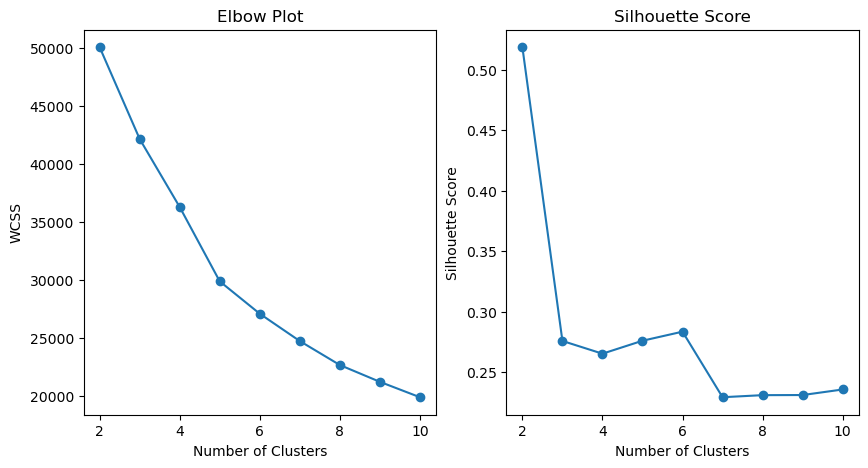

In [299]:
plot_elbow_silhouette(X_sampled)

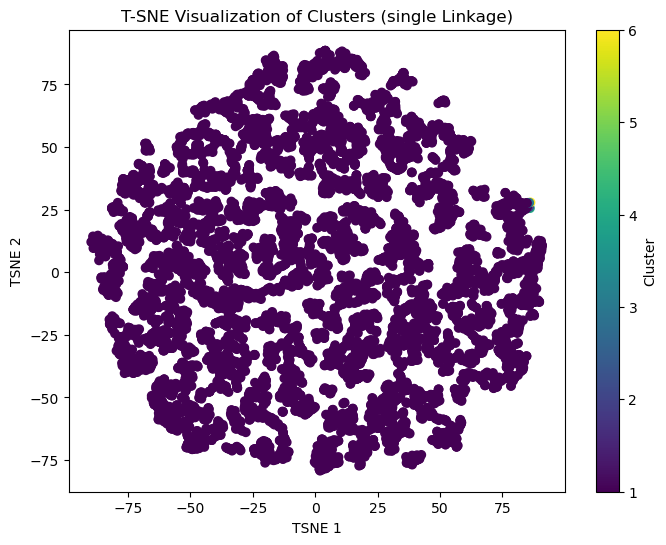

Adjusted Rand Index (ARI) for single linkage: 1.4742890412436996e-06


In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.manifold import TSNE


linkage_methods = ['ward', 'single', 'complete', 'average']
silhouette_scores_methods = {}
num_clusters = 6  

for method in linkage_methods:
    Z = linkage(X_sampled, method=method)
    clusters = fcluster(Z, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_sampled, clusters)
    silhouette_scores_methods[method] = silhouette_avg

# T-SNE 
best_method = max(silhouette_scores_methods, key=silhouette_scores_methods.get)
Z = linkage(X_sampled, method=best_method)
clusters_best_method = fcluster(Z, t=num_clusters, criterion='maxclust')
if len(clusters_best_method) != X_sampled.shape[0]:
    print(f"⚠ Warning: Clustered data ({len(clusters_best_method)}) does not match dataset ({X_sampled.shape[0]})")
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_best_method, cmap='viridis')
plt.title(f"T-SNE Visualization of Clusters ({best_method} Linkage)")
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 4: Adjusted Rand Index Evaluation
true_labels = np.random.randint(0, num_clusters, size=X_sampled.shape[0]) 
ari_score = adjusted_rand_score(true_labels, clusters_best_method)
print(f"Adjusted Rand Index (ARI) for {best_method} linkage: {ari_score}")


In [ ]:
def calculate_ari_timelapses(model, X_scaled, true_labels, timelapse_intervals=[3, 6, 12, 24]):
    """
    Calcule l'Adjusted Rand Index (ARI) pour différents intervalles de temps.
    
    Paramètres:
    -----------
    model : modèle de clustering (ex: KMeans)
    X_scaled : données mises à l'échelle
    true_labels : labels réels pour le calcul de l'ARI
    timelapse_intervals : liste des intervalles de temps à tester
    
    Retourne:
    ---------
    dictionnaire des scores ARI pour chaque intervalle
    """
    ari_scores = {}
    
    for interval in timelapse_intervals:
        # Simuler un sous-ensemble des données correspondant à l'intervalle
        partial_data = X_scaled[:len(X_scaled)//interval, :]
        
        # Réentraîner le modèle sur le sous-ensemble
        model.fit(partial_data)
        
        # Prédire les labels sur l'ensemble des données
        predicted_labels = model.predict(X_scaled)
        
        # Calculer l'ARI
        ari_score = adjusted_rand_score(true_labels, predicted_labels)
        ari_scores[interval] = ari_score
        
        print(f"🕒 ARI pour l'intervalle de {interval} mois : {ari_score:.4f}")
    
    # Trouver l'intervalle avec le meilleur score ARI
    best_interval = max(ari_scores, key=ari_scores.get)
    print(f"\n✅ Meilleur intervalle de mise à jour : {best_interval} mois")
    
    return ari_scores


# Instantiate a KMeans model to use with ARI timelapses function
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Calculate ARI for different timelapses
ari_timelapses_results = calculate_ari_timelapses(
    model=kmeans, 
    X_scaled=X_sampled, 
    true_labels=true_labels
) # Les résultats ne sont pas très conclants 

🕒 ARI pour l'intervalle de 3 mois : 0.0002
🕒 ARI pour l'intervalle de 6 mois : 0.0001
🕒 ARI pour l'intervalle de 12 mois : 0.0001
🕒 ARI pour l'intervalle de 24 mois : -0.0000

✅ Meilleur intervalle de mise à jour : 3 mois


c:\Users\lacpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Gaussian Mixture

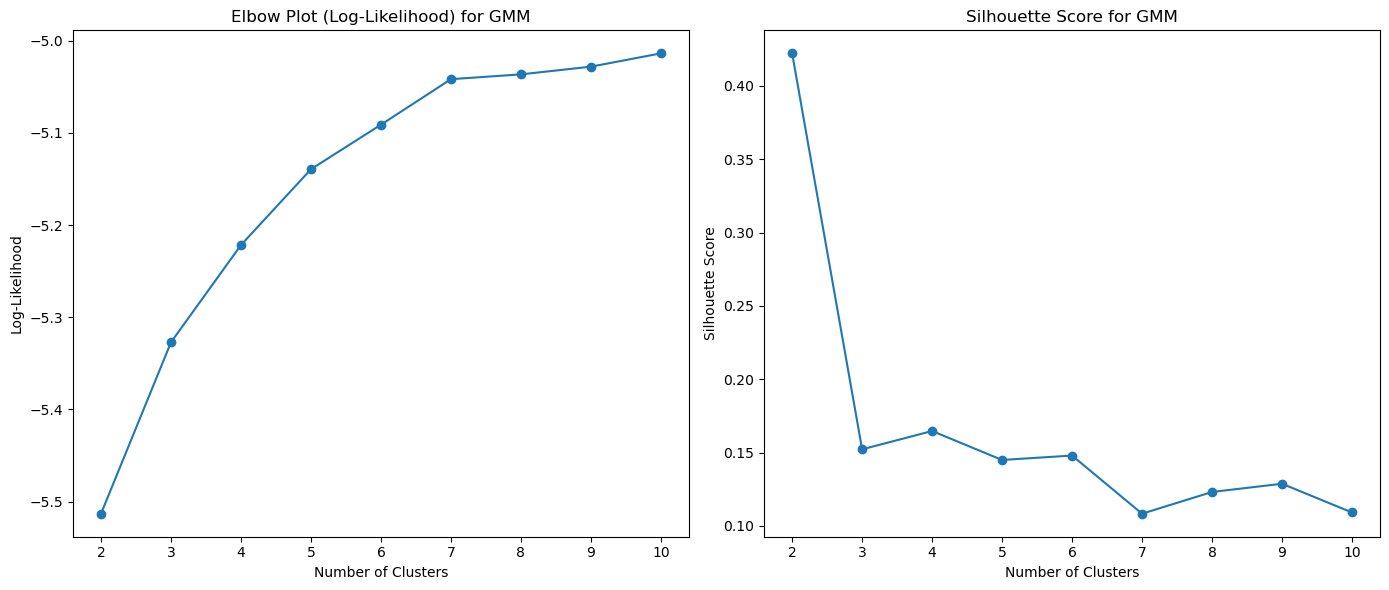

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Range of possible cluster numbers
cluster_range = range(2, 11)

# Elbow Plot (WCSS for GMM)
wcss = []
silhouette_scores = []

for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_sampled)
    gmm_labels = gmm.predict(X_sampled)
    
    # WCSS is calculated via the log-likelihood for GMM
    wcss.append(gmm.score(X_sampled))  # Log-likelihood, not the traditional WCSS
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_sampled, gmm_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow (WCSS)
plt.figure(figsize=(14, 6))

# Subplot 1: Elbow Plot (Log-Likelihood)
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title("Elbow Plot (Log-Likelihood) for GMM")
plt.xlabel('Number of Clusters')
plt.ylabel('Log-Likelihood')

# Subplot 2: Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for GMM")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


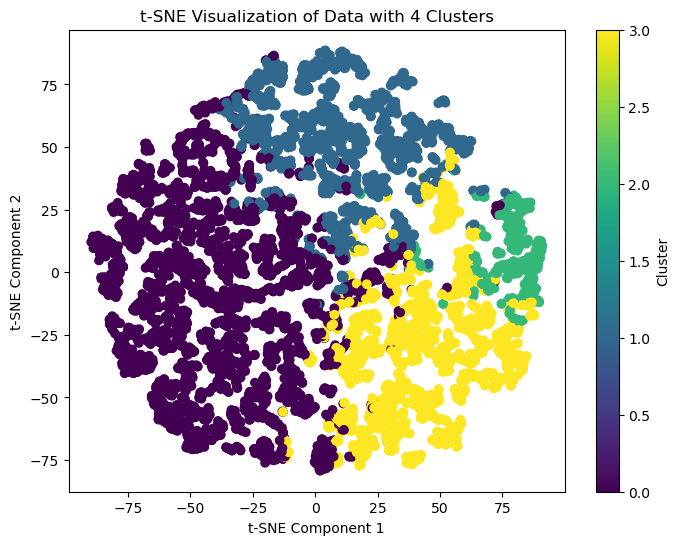

In [316]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# Nombre de clusters souhaités (ici 4)
num_clusters = 4

# Appliquer KMeans pour obtenir les clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_sampled)  # X_pca étant le dataset réduit

# Appliquer t-SNE pour réduire la dimensionnalité
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

# Plot des clusters sur le plan réduit par t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title(f"t-SNE Visualization of Data with {num_clusters} Clusters")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster

# Supposons que X_sampled est le dataset que nous avons réduit

# Nombre de clusters souhaités (ici 4)
num_clusters = 4

# Appliquer GMM ou Hierarchical Clustering (selon le modèle)
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_sampled)

# ARI Score Evaluation
true_labels = np.random.randint(0, num_clusters, size=X_sampled.shape[0])  # Pour la démonstration
ari_gmm = adjusted_rand_score(true_labels, gmm_labels)

print(f"ARI Score (GMM): {ari_gmm:.4f}")

# Function to Evaluate Retraining Frequency
def evaluate_retraining_frequency(model, X, true_labels, retrain_intervals=[3, 6, 12]):
    scores = {}
    for interval in retrain_intervals:
        # Simuler l'entraînement du modèle avec une fraction des données
        partial_data = X[:len(X)//interval, :]
        model.fit(partial_data)
        
        # Si c'est un modèle GMM, on utilise .predict() pour prédire les labels
        if hasattr(model, 'predict'):
            labels_new = model.predict(X)
        else:
            # Sinon, utiliser le clustering hiérarchique (exemple ici avec linkage 'ward')
            Z = linkage(X, method='ward')
            labels_new = fcluster(Z, num_clusters, criterion='maxclust')

        # Calcul du ARI pour les nouvelles prédictions
        ari_new = adjusted_rand_score(true_labels, labels_new)
        scores[interval] = ari_new
        print(f"📊 ARI après réentraînement tous les {interval} mois : {ari_new:.4f}")

    # Sélectionner la meilleure fréquence de réentraînement
    best_interval = max(scores, key=scores.get)
    print(f"✅ Fréquence de mise à jour recommandée : tous les {best_interval} mois")

# Évaluation de la fréquence de réentraînement pour GMM
evaluate_retraining_frequency(gmm, X_sampled, true_labels)

# Les résultats ne sont pas très concluants

ARI Score (GMM): -0.0001
📊 ARI après réentraînement tous les 3 mois : -0.0001
📊 ARI après réentraînement tous les 6 mois : -0.0001
📊 ARI après réentraînement tous les 12 mois : -0.0001
✅ Fréquence de mise à jour recommandée : tous les 6 mois


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [78]:
def tune_dbscan_hyperparameters(X, eps_range=None, min_samples_range=None):
    """
    Tune DBSCAN hyperparameters using silhouette score
    
    Parameters:
    -----------
    X : array-like
        Input data
    eps_range : list, optional
        Range of eps values to test
    min_samples_range : list, optional
        Range of min_samples values to test
    
    Returns:
    --------
    tuple : Best eps and min_samples values
    """
    # Default ranges if not provided
    if eps_range is None:
        # Use the k-distance plot to inform this range
        neigh = NearestNeighbors(n_neighbors=5)
        nbrs = neigh.fit(X)
        distances, _ = nbrs.kneighbors(X)
        distances = np.sort(distances[:, -1])
        
        # Ensure that the minimum value for eps is greater than zero
        eps_range = np.linspace(distances.min(), distances.max(), 20)
        
        # Make sure we don't have eps equal to zero
        eps_range = np.maximum(eps_range, 1e-5)  # Ensure eps > 0
    
    if min_samples_range is None:
        min_samples_range = range(2, min(10, X.shape[1] + 2))
    
    best_score = -1
    best_eps = None
    best_min_samples = None
    
    results = {}
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            # Perform DBSCAN clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X)
            
            # Skip if no clusters found or all points are noise
            unique_clusters = np.unique(clusters)
            if len(unique_clusters) <= 1 or -1 not in unique_clusters:
                continue
            
            # Remove noise points for silhouette score
            mask = clusters != -1
            try:
                score = silhouette_score(X[mask], clusters[mask])
                results[(eps, min_samples)] = score
                
                # Update best parameters
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
            except:
                continue
    
    print("Best Hyperparameters:")
    print(f"Epsilon (eps): {best_eps}")
    print(f"Minimum Samples: {best_min_samples}")
    print(f"Silhouette Score: {best_score}")
    
    return best_eps, best_min_samples, results


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

def plot_k_distance(X, k=5):
    """
    Plot K-distance graph to help determine epsilon (eps) parameter
    
    Parameters:
    -----------
    X : array-like
        Input data
    k : int, optional (default=5)
        Number of nearest neighbors to consider
    """
    # Compute k-distance graph
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Sort the distances and plot
    distances = np.sort(distances[:, -1])
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(distances)), distances)
    plt.title(f'{k}-Distance Graph')
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {k}th Nearest Neighbor')
    plt.show()

def visualize_dbscan_clusters(X, eps, min_samples):
    """
    Perform DBSCAN clustering and visualize results
    
    Parameters:
    -----------
    X : array-like
        Input data
    eps : float
        Epsilon parameter for DBSCAN
    min_samples : int
        Minimum number of samples to form a cluster
    """
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    
    # Dimensionality reduction for visualization (TSNE)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Visualization
    plt.figure(figsize=(10, 8))
    # Plot clusters
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                          c=clusters, 
                          cmap='viridis', 
                          alpha=0.7)
    plt.colorbar(scatter)
    plt.title('DBSCAN Clustering Visualization (T-SNE)')
    plt.xlabel('T-SNE Component 1')
    plt.ylabel('T-SNE Component 2')
    plt.show()
    
    # Cluster statistics
    unique_clusters = np.unique(clusters)
    print("\nClustering Statistics:")
    print(f"Total number of clusters (including noise): {len(unique_clusters)}")
    print("Cluster sizes:")
    for cluster in unique_clusters:
        cluster_size = np.sum(clusters == cluster)
        if cluster == -1:
            print(f"Noise points: {cluster_size}")
        else:
            print(f"Cluster {cluster}: {cluster_size} points")

def tune_dbscan_hyperparameters(X, eps_range=None, min_samples_range=None):
    """
    Tune DBSCAN hyperparameters using silhouette score
    
    Parameters:
    -----------
    X : array-like
        Input data
    eps_range : list, optional
        Range of eps values to test
    min_samples_range : list, optional
        Range of min_samples values to test
    
    Returns:
    --------
    tuple : Best eps and min_samples values
    """
    # Default ranges if not provided
    if eps_range is None:
        # Use the k-distance plot to inform this range
        neigh = NearestNeighbors(n_neighbors=5)
        nbrs = neigh.fit(X)
        distances, _ = nbrs.kneighbors(X)
        distances = np.sort(distances[:, -1])
        
        # Ensure that the minimum value for eps is greater than zero
        eps_range = np.linspace(distances.min(), distances.max(), 20)
        
        # Make sure we don't have eps equal to zero
        eps_range = np.maximum(eps_range, 1e-5)  # Ensure eps > 0
    
    if min_samples_range is None:
        min_samples_range = range(2, min(10, X.shape[1] + 2))
    
    best_score = -1
    best_eps = None
    best_min_samples = None
    
    results = {}
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            # Perform DBSCAN clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X)
            
            # Skip if no clusters found or all points are noise
            unique_clusters = np.unique(clusters)
            if len(unique_clusters) <= 1 or -1 not in unique_clusters:
                continue
            
            # Remove noise points for silhouette score
            mask = clusters != -1
            try:
                score = silhouette_score(X[mask], clusters[mask])
                results[(eps, min_samples)] = score
                
                # Update best parameters
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
            except:
                continue
    
    print("Best Hyperparameters:")
    print(f"Epsilon (eps): {best_eps}")
    print(f"Minimum Samples: {best_min_samples}")
    print(f"Silhouette Score: {best_score}")
    
    return best_eps, best_min_samples, results

# Main execution for DBSCAN analysis
def run_dbscan_analysis(X_pca):
    """
    Comprehensive DBSCAN analysis
    
    Parameters:
    -----------
    X_pca : array-like
        PCA-transformed data
    """
    # Plot K-distance graph
    plot_k_distance(X_pca)
    
    # Tune hyperparameters
    best_eps, best_min_samples, results = tune_dbscan_hyperparameters(X_pca)
    
    # Visualize clusters with best parameters
    visualize_dbscan_clusters(X_pca, best_eps, best_min_samples)
    
    return best_eps, best_min_samples, results

# Exemple d'utilisation avec votre jeu de données X_sampled (PCA-transformed)
# run_dbscan_analysis(X_sampled) # Décommentez ceci avec votre propre jeu de données


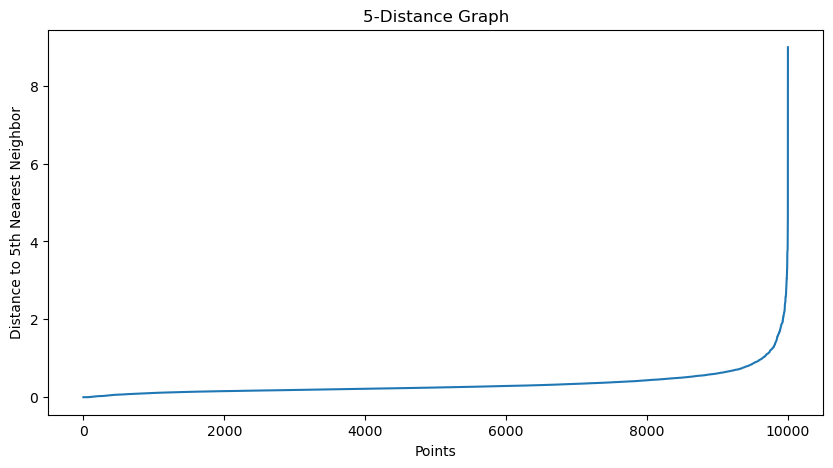

Best Hyperparameters:
Epsilon (eps): 1e-05
Minimum Samples: 4
Silhouette Score: 0.9999999448699073


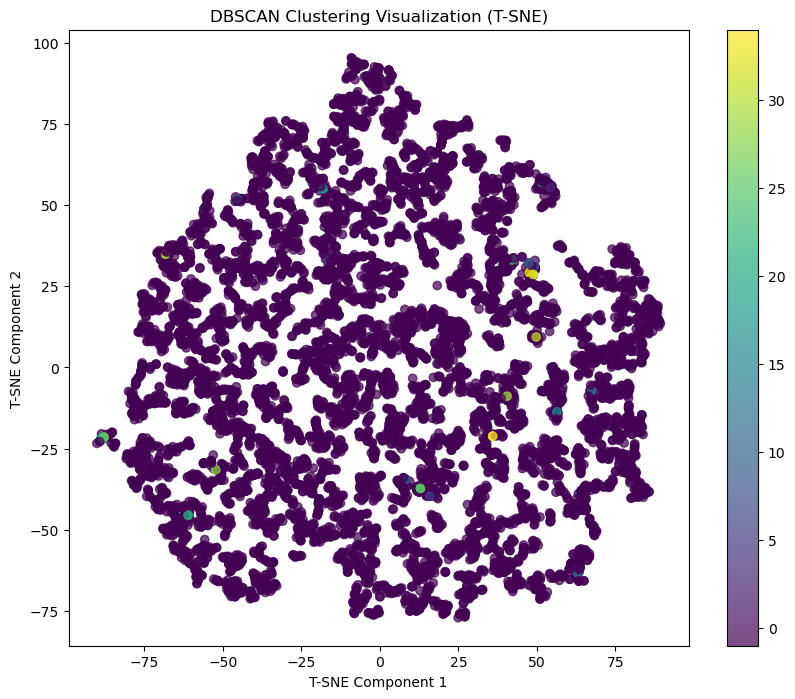

(1e-05,
 4,
 {(1e-05, 2): 0.9999998508868381,
  (1e-05, 3): 0.9999998790458543,
  (1e-05, 4): 0.9999999448699073,
  (1e-05, 5): 0.9999998882660355,
  (0.4730550476632199, 2): -0.23561846470168354,
  (0.4730550476632199, 3): -0.1948192117862222,
  (0.4730550476632199, 4): -0.16767914476241966,
  (0.4730550476632199, 5): -0.13412647024217222,
  (0.9461100953264397, 2): 0.24111172714913034,
  (0.9461100953264397, 3): 0.2574910209526263,
  (0.9461100953264397, 4): 0.32846083914036456,
  (0.9461100953264397, 5): 0.34911681308208664,
  (1.4191651429896597, 2): 0.4742589852152149,
  (1.4191651429896597, 3): 0.6011773116950745,
  (1.4191651429896597, 4): 0.6199380742541885,
  (1.4191651429896597, 5): 0.6492473265378578,
  (1.8922201906528795, 2): 0.5760378574124286,
  (1.8922201906528795, 3): 0.7533287016923713,
  (1.8922201906528795, 4): 0.7611432316689756,
  (2.3652752383160993, 2): 0.5757118674354245,
  (2.3652752383160993, 3): 0.7591845229224491,
  (2.3652752383160993, 4): 0.75242614168207

In [79]:
# Main execution
def run_dbscan_analysis(X_pca):
    # Plot K-distance graph
    plot_k_distance(X_pca)
    
    # Tune hyperparameters
    best_eps, best_min_samples, results = tune_dbscan_hyperparameters(X_pca)
    
    # Visualize clusters with best parameters
    visualize_dbscan_clusters(X_pca, best_eps, best_min_samples)
    
    return best_eps, best_min_samples, results


# Exemple d'utilisation
run_dbscan_analysis(X_sampled)

Silhouette Score (DBSCAN): -0.5273182
ARI Score (DBSCAN): -0.0000


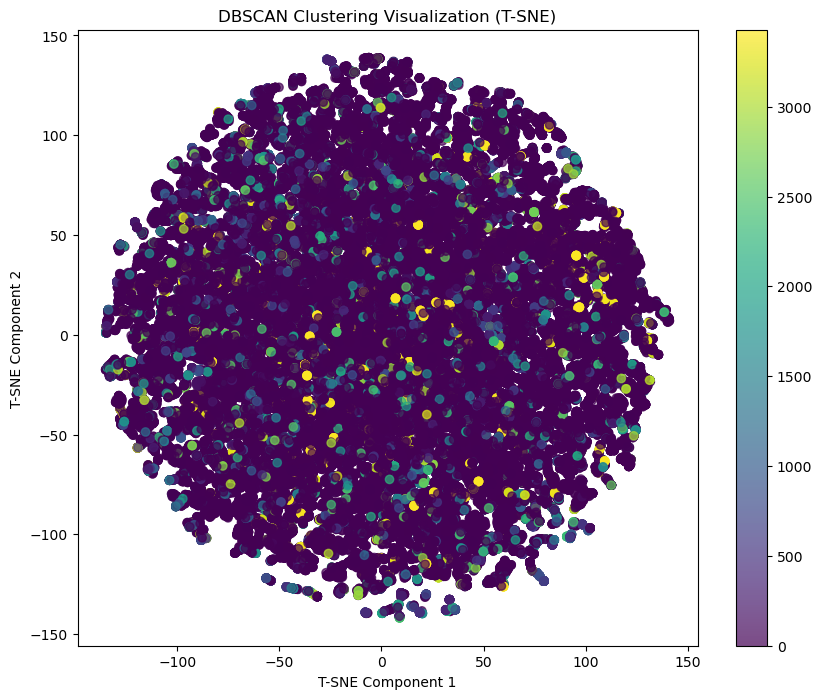

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Paramètres optimaux pour DBSCAN
eps = 1e-05  # Meilleur epsilon
min_samples = 4  # Meilleur minimum de points

# Appliquer DBSCAN avec les meilleurs paramètres
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_pca)  # Utiliser le dataset réduit à 4 composantes

# Calcul du Silhouette Score
if len(set(dbscan_labels)) > 1:  # Vérifier qu'il y a au moins 2 clusters
    silhouette = silhouette_score(X_pca, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {silhouette:.7f}")
else:
    print("Silhouette Score non calculable (moins de 2 clusters formés).")

# Évaluation avec ARI Score (si vous avez les vrais labels)
true_labels = np.random.randint(0, 4, size=X_pca.shape[0])  # Exemple de labels pour démonstration
ari_dbscan = adjusted_rand_score(true_labels, dbscan_labels)
print(f"ARI Score (DBSCAN): {ari_dbscan:.4f}")

# Visualisation T-SNE des clusters DBSCAN
def visualize_dbscan_clusters(X, labels):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar()
    plt.title('DBSCAN Clustering Visualization (T-SNE)')
    plt.xlabel('T-SNE Component 1')
    plt.ylabel('T-SNE Component 2')
    plt.show()

visualize_dbscan_clusters(X_pca, dbscan_labels)


In [82]:
ari_dbscan

-9.788502464826426e-06